# DS 207R FINAL PROJECT: Analyzing Music Genres by Audio Features
## Fall 2023

John Tayag

## Step 1: Find a dataset or datasets


### 1.1. **Based on your interest, identify a dataset which you will want to examine.** 
 
For this project, I have 3 datasets that I obtained from Spotify's API endpoints using the Spotipy library. The code used to obtain these playlists can be accessed [here](https://github.com/johnmtayag/DSC_207R_SpotifyGenreAnalysis).

### 1.2. **Once selected, explain the choice of dataset and why you want to work with it.**
I want to work with this dataset because I find music to be a fascinating artform. While some songs are fairly "generic" to appeal to wider audiences, others are much more niche, aiming to push the boundaries of what we consider to be music. When I listen to music, I often find similarities to other songs, even between different genres. These datasets contain a lot of calculated metrics for each song that attempts to quantify aspects of the listening experience, and I think it would be very interesting to see what trends pop up across songs of different genres, if any actually exist at all.

[Link to the datasets on Github](https://github.com/johnmtayag/DSC_207R_SpotifyGenreAnalysis)

This is a summary of my process collecting this data:

1. A list of genres is generated by the user. These genres are then used as seeds for [Every Noise](https://everynoise.com/everynoise1d.cgi?root=jazz&scope=mainstream%20only), a database containing all of Spotify's genre keywords. The genres are organized by similarity, so the top 5 genre results for each genre seed (as well as the genre name itself) are recorded as subgenre seeds.
    * The subgenre values are used as the query search terms and are used to expand the search scope to find more specific genre variants
2. For each subgenre seed, at most 25 playlists are queried from Spotify's database. Each playlist contains the subgenre seed keyword in either the playlist name or description. These playlists are recorded in "playlist_df."
    * playlist_df contains 1164 rows
3. From each obtained playlist, at most 50 tracks and relevant details are queried from Spotify's database. All of the results are recorded in "track_df."
    * track_df contains 54,877 rows
4. For each obtained track, the audio features that Spotify records are queried from Spotify's database. All of the results are recorded in "audio_df."
    * audio_df contains 54,677 rows
5. The three datasets will then be joined in this project for analysis.

#### Why add this process of using genre/subgenre seeds?
As it turns out, Spotify does not actually record the genre of an individual track - only the genre of a given artist is stored in the database. However, since artists can release music under different genres, using the artist genre as a track genre can lead to inaccurate conclusions. To get around this, I used a modified process from [a blogpost by Kaylin Pavlik](https://www.kaylinpavlik.com/classifying-songs-genres/) where the name of a genre is used as a search query to obtain a set of playlists related to that genre. This allows a fairly simple assignment of genre to large batches of tracks. However, there is one major caveat to this process - as many playlists are user-generated, they may not be entirely accurate. For this analysis, I will assume they are accurate, but this is an important detail to consider.

#### An example of finding the subgenre seeds for Jazz
![An example of finding the subgenre seeds for Jazz](EveryNoise_JazzExample.png)


### Variable Explanation
Each dataset's variables are explained below. Variables queried from Spotify have descriptions summarized from the Spotify Web API documentation.

**playlist_df**: Contains information about queried playlists.
* *playlist_genre*: The main genre of the playlist. The genres and subgenres are listed below:
    * pop
        * pop, dance pop, post-teen pop, boy band, uk pop, alt z
    * r&b
        * r&b, urban contemporary, contemporary r&b, neo soul, alternative r&b, uk contemporary r&b
    * rock
        * rock, album rock, clasic rock, heartland rock, hard rock, permanent wave
    * hip hop
        * hip hop, urban contemporary, southern hip hop, atl hip hop, hardcore hip hop, west coast hip hop
    * rap
        * rap, trap, pop rap, gangster rap, dirty south rap, melodic rap
    * edm
        * edm, pop dance, electro house, dutch house, progressive electro house, brostep
    * jazz
        * jazz, vocal jazz, adult standards, lounge, movie tunes, soul
    * country
        * country, country road, contemporary country, country rock, modern country rock, country dawn
    * classical
        * classical, compositional ambient, orchestral soundtrack, soundtrack, healing hz, easy listening
* *playlist_subgenre*: The subgenre of the playlist
* *playlist_id*: The ID of the playlist in Spotify
* *playlist_name*: The name of the playlist
* *playlist_owner*: The owner of the playlist
* *playlist_description*: The description of the playlist
* *playlist_numtracks*: The number of tracks listed in the playlist

**track_df**: Contains information about tracks in each queried playlist from playlist_df.
* *playlist_id*: The playlist that this row's track is contained in
* *track_id*: The obtained track ID
* *track_name*: The name of the track
* *track_popularity*: The popularity of the track on Spotify on the scale [0, 100]
    * Per the documentation, this is based on both the total number of plays as well as the number of recent plays, with recent plays having a higher weight.
* *album_id*: The ID of the album that the track was released in
* *album_name*: The name of the album that the track was released in
* *album_type*: The album type (i.e., whether it is an album, a single, or a compilation)
* *album_release_date*: When the album was released
* *album_markets*: If available, the list of worldwide markets that the track is available in
* *album_total_tracks*: The number of tracks in the album
* *artist_id*: The ID of the artist who released the track
* *artist_name*: The name of the artist who released the track

**audio_df**: Contains audio information about tracks in track_df. Each of these definitions are summarized from Spotify's Web API documentation.
* *danceability*: A measure of how suitable a song is for dancing on the scale [0, 1]
    * Based on variables regarding the tempo, beat, and regularity of the song
* *energy*: A measure of song intensity on the scale [0, 1]
    * Based on variables regarding range, loudness, timbre, entropy
* *key*: The overall key of the song mapped to pitches
    * if no key was detected, the value is -1
* *loudness*: How overall loud a song is measured in dB, typically in the range between -60 and 0 dB
    * Loudness is averaged across the entire track
* *mode*: Indicates the average modality of a song
    * Minor: 0
    * Major: 1
* *speechiness*: Measures the amount of spoken words in a song on the scale [0,1]
    * (0.66, 1] indicates the song is mostly spoken words
    * (0.33, 0.66] indicates a mix of music and speech
    * [0, 0.33] indicates the song is mostly music
* *acousticness*: A confidence measure of whether or not the song is acoustic on the scale [0.1]
* *instrumentalness*: A confidence measure of whether or not a song contains no vocals on the scale [0,1]
    * (0.5, 1] indicates a high likelihood that the song contains no vocals
* *liveness*: A confidence measure of whether or not the song was performed live on the scale [0,1]
    * (0.8, 1] indicates a high likelinood that the song was performed live
* *valence*: Measures how "positive" a song sounds on the scale [0,1]
* *tempo*: The overall tempo of a song in BPM
* *id*: The track ID 
* *duration_ms*: The duration of the song in ms
* *time signature*: The time-signature of a song from 3 to 4 (3/4 to 7/4)



## Step 2: Explore the datasets

#### Importing Libraries
First, I will import all relevant libraries. Then, I will load the dataset, print the first 5 rows, and then use the .describe() methods to view some statistics about the numeric columns.

In [1]:
# Import general libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Decision Tree / Random forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Loading and viewing the datasets

In [2]:
# Dataset 1: playlist_df
filename = "https://raw.githubusercontent.com/johnmtayag/DSC_207R_SpotifyGenreAnalysis/main/playlist_df.csv"
playlist_df = pd.read_csv(filename, index_col=0)

print(playlist_df.columns)
print(f"\nNumber of rows: {playlist_df.shape[0]}")
playlist_df.head(5)

Index(['playlist_genre', 'playlist_subgenre', 'playlist_id', 'playlist_name',
       'playlist_owner', 'playlist_description', 'playlist_numtracks'],
      dtype='object')

Number of rows: 1164


playlist_genre playlist_subgenre  \
6mtYuOxzl58vSGnEDtZ9uB            rap           pop rap   
37i9dQZF1EQncLwOalG3K7            pop               pop   
37i9dQZF1DWUa8ZRTfalHk            pop               pop   
5TDtuKDbOhrfW7C58XnriZ            pop               pop   
5mHjseWRbEExCej6J1qsQJ            pop               pop   

                                   playlist_id          playlist_name  \
6mtYuOxzl58vSGnEDtZ9uB  6mtYuOxzl58vSGnEDtZ9uB  Pop Hits 2000s – 2023   
37i9dQZF1EQncLwOalG3K7  37i9dQZF1EQncLwOalG3K7                Pop Mix   
37i9dQZF1DWUa8ZRTfalHk  37i9dQZF1DWUa8ZRTfalHk             Pop Rising   
5TDtuKDbOhrfW7C58XnriZ  5TDtuKDbOhrfW7C58XnriZ          Pop Hits 2023   
5mHjseWRbEExCej6J1qsQJ  5mHjseWRbEExCej6J1qsQJ                    pop   

                       playlist_owner  \
6mtYuOxzl58vSGnEDtZ9uB           user   
37i9dQZF1EQncLwOalG3K7        spotify   
37i9dQZF1DWUa8ZRTfalHk        spotify   
5TDtuKDbOhrfW7C58XnriZ           user   
5mHjseWRbEExCej6J1qsQJ           user   

                                                     playlist_description  \
6mtYuOxzl58vSGnEDtZ9uB  old but gold, all the best throwback songs to ...   
37i9dQZF1EQncLwOalG3K7  <a href=spotify:playlist:37i9dQZF1EIYIe6aZAczQ...   
37i9dQZF1DWUa8ZRTfalHk     Who's now and next in pop. Cover: Dove Cameron   
5TDtuKDbOhrfW7C58XnriZ  Listen here for all of the hottest pop tracks ...   
5mHjseWRbEExCej6J1qsQJ  for inquiries pls email: hannah@craftplaylists...   

                        playlist_numtracks  
6mtYuOxzl58vSGnEDtZ9uB                 288  
37i9dQZF1EQncLwOalG3K7                  50  
37i9dQZF1DWUa8ZRTfalHk                  86  
5TDtuKDbOhrfW7C58XnriZ                  50  
5mHjseWRbEExCej6J1qsQJ                  44

In [3]:
# Dataset 2: track_df
filename = "https://raw.githubusercontent.com/johnmtayag/DSC_207R_SpotifyGenreAnalysis/main/track_df.csv"
track_df = pd.read_csv(filename, index_col=0)

print(track_df.columns)
print(f"\nNumber of rows: {track_df.shape[0]}")
track_df.head(5)

Index(['playlist_id', 'track_id', 'track_name', 'track_popularity', 'album_id',
       'album_name', 'album_type', 'album_release_date', 'album_markets',
       'album_total_tracks', 'artist_id', 'artist_name'],
      dtype='object')

Number of rows: 54877


playlist_id  \
6mtYuOxzl58vSGnEDtZ9uB++2meEiZKWkiN28gITzFwQo5  6mtYuOxzl58vSGnEDtZ9uB   
6mtYuOxzl58vSGnEDtZ9uB++1OXfWI3FQMdsKKC6lkvzSx  6mtYuOxzl58vSGnEDtZ9uB   
6mtYuOxzl58vSGnEDtZ9uB++4pSPMXaCjbaV3VSzZQYC7H  6mtYuOxzl58vSGnEDtZ9uB   
6mtYuOxzl58vSGnEDtZ9uB++0yLdNVWF3Srea0uzk55zFn  6mtYuOxzl58vSGnEDtZ9uB   
6mtYuOxzl58vSGnEDtZ9uB++6Knv6wdA0luoMUuuoYi2i1  6mtYuOxzl58vSGnEDtZ9uB   

                                                              track_id  \
6mtYuOxzl58vSGnEDtZ9uB++2meEiZKWkiN28gITzFwQo5  2meEiZKWkiN28gITzFwQo5   
6mtYuOxzl58vSGnEDtZ9uB++1OXfWI3FQMdsKKC6lkvzSx  1OXfWI3FQMdsKKC6lkvzSx   
6mtYuOxzl58vSGnEDtZ9uB++4pSPMXaCjbaV3VSzZQYC7H  4pSPMXaCjbaV3VSzZQYC7H   
6mtYuOxzl58vSGnEDtZ9uB++0yLdNVWF3Srea0uzk55zFn  0yLdNVWF3Srea0uzk55zFn   
6mtYuOxzl58vSGnEDtZ9uB++6Knv6wdA0luoMUuuoYi2i1  6Knv6wdA0luoMUuuoYi2i1   

                                                   track_name  \
6mtYuOxzl58vSGnEDtZ9uB++2meEiZKWkiN28gITzFwQo5       Into You   
6mtYuOxzl58vSGnEDtZ9uB++1OXfWI3FQMdsKKC6lkvzSx  Glad You Came   
6mtYuOxzl58vSGnEDtZ9uB++4pSPMXaCjbaV3VSzZQYC7H       Who Knew   
6mtYuOxzl58vSGnEDtZ9uB++0yLdNVWF3Srea0uzk55zFn        Flowers   
6mtYuOxzl58vSGnEDtZ9uB++6Knv6wdA0luoMUuuoYi2i1       My House   

                                                track_popularity  \
6mtYuOxzl58vSGnEDtZ9uB++2meEiZKWkiN28gITzFwQo5                 1   
6mtYuOxzl58vSGnEDtZ9uB++1OXfWI3FQMdsKKC6lkvzSx                 3   
6mtYuOxzl58vSGnEDtZ9uB++4pSPMXaCjbaV3VSzZQYC7H                 0   
6mtYuOxzl58vSGnEDtZ9uB++0yLdNVWF3Srea0uzk55zFn                52   
6mtYuOxzl58vSGnEDtZ9uB++6Knv6wdA0luoMUuuoYi2i1                78   

                                                              album_id  \
6mtYuOxzl58vSGnEDtZ9uB++2meEiZKWkiN28gITzFwQo5  3OZgEywV4krCZ814pTJWr7   
6mtYuOxzl58vSGnEDtZ9uB++1OXfWI3FQMdsKKC6lkvzSx  2ZmXUoLcHfK4Y7WctcYk60   
6mtYuOxzl58vSGnEDtZ9uB++4pSPMXaCjbaV3VSzZQYC7H  2tUn9E3nHXhUIJ47yv6ePD   
6mtYuOxzl58vSGnEDtZ9uB++0yLdNVWF3Srea0uzk55zFn  7I0tjwFtxUwBC1vgyeMAax   
6mtYuOxzl58vSGnEDtZ9uB++6Knv6wdA0luoMUuuoYi2i1  5lkNnHVlnCCCV304t89wOH   

                                                               album_name  \
6mtYuOxzl58vSGnEDtZ9uB++2meEiZKWkiN28gITzFwQo5            Dangerous Woman   
6mtYuOxzl58vSGnEDtZ9uB++1OXfWI3FQMdsKKC6lkvzSx              Glad You Came   
6mtYuOxzl58vSGnEDtZ9uB++4pSPMXaCjbaV3VSzZQYC7H  Greatest Hits...So Far!!!   
6mtYuOxzl58vSGnEDtZ9uB++0yLdNVWF3Srea0uzk55zFn                    Flowers   
6mtYuOxzl58vSGnEDtZ9uB++6Knv6wdA0luoMUuuoYi2i1                   My House   

                                                 album_type  \
6mtYuOxzl58vSGnEDtZ9uB++2meEiZKWkiN28gITzFwQo5        album   
6mtYuOxzl58vSGnEDtZ9uB++1OXfWI3FQMdsKKC6lkvzSx       single   
6mtYuOxzl58vSGnEDtZ9uB++4pSPMXaCjbaV3VSzZQYC7H  compilation   
6mtYuOxzl58vSGnEDtZ9uB++0yLdNVWF3Srea0uzk55zFn       single   
6mtYuOxzl58vSGnEDtZ9uB++6Knv6wdA0luoMUuuoYi2i1        album   

                                               album_release_date  \
6mtYuOxzl58vSGnEDtZ9uB++2meEiZKWkiN28gITzFwQo5         2016-05-20   
6mtYuOxzl58vSGnEDtZ9uB++1OXfWI3FQMdsKKC6lkvzSx         2011-01-01   
6mtYuOxzl58vSGnEDtZ9uB++4pSPMXaCjbaV3VSzZQYC7H         2010-11-12   
6mtYuOxzl58vSGnEDtZ9uB++0yLdNVWF3Srea0uzk55zFn         2023-01-13   
6mtYuOxzl58vSGnEDtZ9uB++6Knv6wdA0luoMUuuoYi2i1         2015-04-07   

                                                                                    album_markets  \
6mtYuOxzl58vSGnEDtZ9uB++2meEiZKWkiN28gITzFwQo5                                                 []   
6mtYuOxzl58vSGnEDtZ9uB++1OXfWI3FQMdsKKC6lkvzSx                                                 []   
6mtYuOxzl58vSGnEDtZ9uB++4pSPMXaCjbaV3VSzZQYC7H                                                 []   
6mtYuOxzl58vSGnEDtZ9uB++0yLdNVWF3Srea0uzk55zFn                                                 []   
6mtYuOxzl58vSGnEDtZ9uB++6Knv6wdA0luoMUuuoYi2i1  ['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...   

                                                album_total_

In [4]:
# Dataset 3: audio_df
filename = "https://github.com/johnmtayag/DSC_207R_SpotifyGenreAnalysis/raw/main/audio_df.csv"
audio_df = pd.read_csv(filename, index_col=0)

print(audio_df.columns)
print(f"\nNumber of rows: {audio_df.shape[0]}")
audio_df.head(5)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'id', 'duration_ms', 'time_signature'],
      dtype='object')

Number of rows: 54677


danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.623   0.734    9    -5.948     1       0.1070       0.01620   
1         0.698   0.844    7    -4.549     0       0.0670       0.05770   
2         0.689   0.737    9    -4.516     1       0.0268       0.00482   
3         0.707   0.681    0    -4.325     1       0.0668       0.06320   
4         0.688   0.702    7    -4.792     0       0.0499       0.02150   

   instrumentalness  liveness  valence    tempo                      id  \
0          0.000002    0.1450    0.370  107.853  2meEiZKWkiN28gITzFwQo5   
1          0.000017    0.1050    0.446  126.937  1OXfWI3FQMdsKKC6lkvzSx   
2          0.000000    0.0777    0.470  140.000  4pSPMXaCjbaV3VSzZQYC7H   
3          0.000005    0.0322    0.646  117.999  0yLdNVWF3Srea0uzk55zFn   
4          0.000000    0.1280    0.740   94.006  6Knv6wdA0luoMUuuoYi2i1   

   duration_ms  time_signature  
0       244453               4  
1       198467               4  
2       207893               4  
3       200455               4  
4       192191               4

## Joining the datasets
I will take these actions to join the datasets:

1. I will drop duplicate ID rows from audio_df. This will ensure that each row in audio_df is unique
2. I will reset playlist_df's index
3. I will remove NA values from track_df's ID column. These are most likely tracks added by the user which are not recorded in Spotify's database. Since I need to join with audio_df, NA values may cause issues here.
4. I will join relevant columns from audio_df and playlist_df to track_df in order to create a single dataset. Since tracks can be in multiple playlists, this data frame contains duplicates of tracks

In [5]:
# 1/2/3: Preprocessing the initial datasets
audio_df.drop_duplicates("id", inplace=True)
audio_df.rename(columns={"id":"track_id"}, inplace=True)

playlist_df.reset_index(drop=True, inplace=True)

track_df.dropna(subset="track_id", axis=0, inplace=True)
track_df.reset_index(drop=True, inplace=True)

# 4: Creating a joined dataset
df = track_df.merge(playlist_df[["playlist_id", "playlist_genre", "playlist_subgenre"]], on="playlist_id", how="inner").merge(audio_df, on="track_id", how="inner").sort_values(by="playlist_id").reset_index(drop=True)
df.drop(columns=["playlist_id",  "track_name", "album_id", "album_name", "album_type", "album_markets", "album_total_tracks", "artist_id", "artist_name"], inplace=True)

print("df: The final joined dataset")
print(f"Number of rows: {df.shape[0]}\n")
print("Columns:")
print(df.columns)
df.head(5)

df: The final joined dataset
Number of rows: 54705

Columns:
Index(['track_id', 'track_popularity', 'album_release_date', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')


track_id  track_popularity album_release_date playlist_genre  \
0  0Gpp7RFAcV7DletYJ6KLIU                33         2015-04-09        country   
1  50kcRtu673zyBLtvvRMKHg                51         2007-10-09        country   
2  6AYz5z4ItjOI91X6frrbl2                35         2010-05-25        country   
3  7EyRBo5D7Ez4VlL44TfRVr                39         2015-04-09        country   
4  3fqwjXwUGN6vbzIwvyFMhx                84         2015-05-04        country   

     playlist_subgenre  danceability  energy  key  loudness  mode  \
0  modern country rock         0.832   0.786    4    -7.925     0   
1  modern country rock         0.737   0.820    2    -3.808     1   
2  modern country rock         0.789   0.619    9    -6.622     0   
3  modern country rock         0.504   0.662    2    -8.422     1   
4  modern country rock         0.392   0.370    9   -10.888     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0698        0.3330          0.002130    0.2110    0.768  118.030   
1       0.0351        0.0648          0.000305    0.2850    0.770  115.043   
2       0.0760        0.1390          0.000000    0.0632    0.694   89.995   
3       0.2270        0.0732          0.000000    0.0968    0.688   82.035   
4       0.0298        0.2050          0.009600    0.0821    0.512   48.718   

   duration_ms  time_signature  
0       237458               4  
1       244840               4  
2       227333               4  
3       262683               4  
4       293293               4

## Preprocessing the dataset

I will take the following actions to preprocess the dataset:

* I will check for null values and delete any applicable rows.
* As my analysis relies mainly on the audio features, I will delete duplicate track IDs from the dataset.
* There are some extreme outliers for the duration feature (in the Classical genre particularly) that skew the duration distribution heavily. I will remove the outliers from the dataset.
    * For example, the longest song duration is 5024.62s, or 83 min and 44.62s
    * The duration cutoff is arbitrarily set to Q3 + 2\*IQR = 400.38s, or 6min and 40.38s

### Handling null values

In [6]:
print("There are no null values in the joined dataset\n")
df.info()

#### The below code was written before I dropped columns, but I am keeping it here as a reference
# NA_values = df.loc[df.isna().any(axis=1),df.isna().any(axis=0)].copy()

# print(f"{NA_values.shape[0]} rows with NA handling in df")
# for ind in NA_values.index:
#     df.loc[df.isna().any(axis=1),df.isna().any(axis=0)].copy().loc[ind,:] = "NaN" + str(ind)
    
# print("\nNA values in df shown below:")
# NA_values

There are no null values in the joined dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54705 entries, 0 to 54704
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            54705 non-null  object 
 1   track_popularity    54705 non-null  int64  
 2   album_release_date  54705 non-null  object 
 3   playlist_genre      54705 non-null  object 
 4   playlist_subgenre   54705 non-null  object 
 5   danceability        54705 non-null  float64
 6   energy              54705 non-null  float64
 7   key                 54705 non-null  int64  
 8   loudness            54705 non-null  float64
 9   mode                54705 non-null  int64  
 10  speechiness         54705 non-null  float64
 11  acousticness        54705 non-null  float64
 12  instrumentalness    54705 non-null  float64
 13  liveness            54705 non-null  float64
 14  valence             54705 non-null  float64
 15  tempo

### Removing rows with duplicate track IDs from df

In [7]:
print(f"Number of duplicate rows to be dropped: {df.loc[df.track_id.duplicated(), :].shape[0]}")
df.drop_duplicates("track_id", inplace=True)

print(f"Number of rows remaining: {df.shape[0]}")

Number of duplicate rows to be dropped: 14220
Number of rows remaining: 40485


### Removing extreme duration outliers from df

Note the heavy skew to the right before filtering, as well as the massive time scale on the x-axis. 1e6ms (1,000,000ms) is about 16.67 minutes, much longer than the average song
Duration cutoff: 400.38s, or 6min and 40.38s

Edm
Number of outliers: 327
Longest duration:  3077.49s, or 51 min and 17.49s

Classical
Number of outliers: 271
Longest duration:  2017.02s, or 33 min and 37.02s

Jazz
Number of outliers: 158
Longest duration:  1272.02s, or 21 min and 12.02s

Rock
Number of outliers: 149
Longest duration:  1373.22s, or 22 min and 53.22s

Hip hop
Number of outliers: 69
Longest duration:  861.44s, or 14 min and 21.44s

Country
Number of outliers: 54
Longest duration:  728.14s, or 12 min and 8.14s

Rap
Number of outliers: 38
Longest duration:  586.40s, or 9 min and 46.40s

R&b
Number of outliers: 27
Longest duration:  604.97s, or 10 min and 4.97s

Pop
Number of outliers: 8
Longest duration:  469.73s, or 7 min and 49.73s



Text(0.5, 0, 'Duration (ms)')

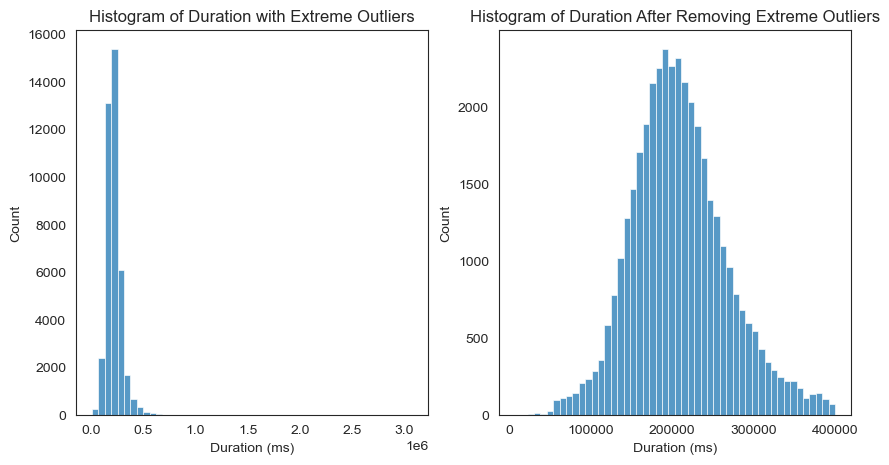

In [8]:
# Viewing histogram of duration
sns.set_palette("tab10")
sns.set_style("white")

col = "duration_ms"

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

sns.histplot(data=df, x=col, bins=50, ax=ax1)
ax1.set_title("Histogram of Duration with Extreme Outliers")
ax1.set_xlabel("Duration (ms)")
print("Note the heavy skew to the right before filtering, as well as the massive time scale on the x-axis. 1e6ms (1,000,000ms) is about 16.67 minutes, much longer than the average song")

Q3 = df[col].quantile(0.75)
Q1 = df[col].quantile(0.25)
IQR = Q3-Q1

col_max = df[col].max()
col_max_s = col_max/1000
col_cutoff = Q3 + 2*IQR
col_cutoff_s = col_cutoff/1000

df_outliers = df.loc[df[col] > col_cutoff, ].copy()

print(f"Duration cutoff: {col_cutoff_s:.2f}s, or {col_cutoff_s//60:.0f}min and {col_cutoff_s%60:.2f}s\n")

for val in df_outliers.playlist_genre.value_counts().index:
    print(val.capitalize())
    val_outliers = df_outliers.loc[df_outliers.playlist_genre == val, "duration_ms"]
    print(f"Number of outliers: {val_outliers.shape[0]}")
    print(f"Longest duration: {val_outliers.max()/1000: .2f}s, or {(val_outliers.max()/1000)//60:.0f} min and {(val_outliers.max()/1000)%60:.2f}s\n")

df = df.loc[df[col] <= col_cutoff, ].reset_index(drop=True)

sns.histplot(data=df, x=col, bins=50, ax=ax2)
ax2.set_title("Histogram of Duration After Removing Extreme Outliers")
ax2.set_xlabel("Duration (ms)")

## Exploring the Dataset


In [9]:
# This step creates a list each of the continuous and categorical audio features for easy reference in building the plots
audio_features = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]
audio_features_categorical = ["key", "mode", "time_signature"]

Text(0, 0.5, 'Genre')

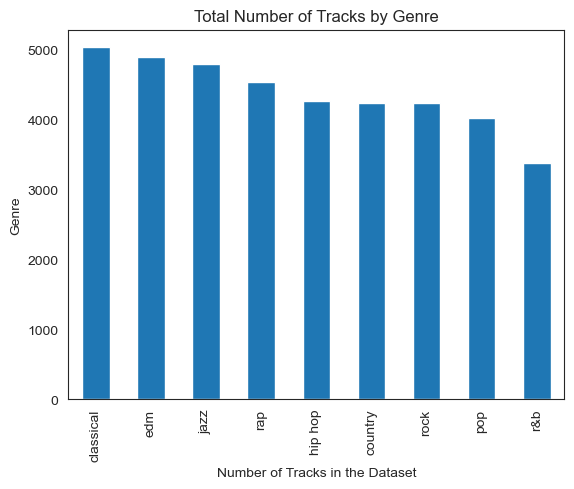

In [10]:
# Viewing the number of each genre/subgenre
sns.set_palette("tab10")
sns.set_style("white")

ax = df.playlist_genre.value_counts().plot(kind="bar")
ax.set_title("Total Number of Tracks by Genre")
ax.set_xlabel("Number of Tracks in the Dataset")
ax.set_ylabel("Genre")

**Things to Note**:

* Classical music has the largest proportion of tracks (around 5000)
* R&B music has the smallest proportion of tracks (around 3500)
* The difference in the number of tracks may impact the analysis later

Text(0.5, 0, 'Popularity (%)')

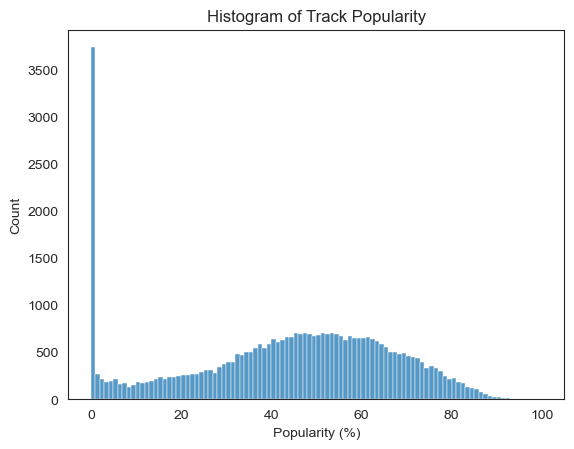

In [11]:
# Viewing histograms of popularity
sns.set_palette("tab10")
sns.set_style("white")

xcol = "track_popularity"

ax = sns.histplot(data=df, x=xcol, bins=100)
ax.set_title("Histogram of Track Popularity")
ax.set_xlabel("Popularity (%)")

**Things to Note**:

* About 3500-4000 songs have a popularity value between 0 and 2
* The distribution plateaus between popularity=40 and popularity=60
* There are very few songs with a popularity value above 90

playlist_genre
classical     92
country       93
edm           97
hip hop       93
jazz          95
pop          100
r&b           97
rap           99
rock          95
Name: track_popularity, dtype: int64

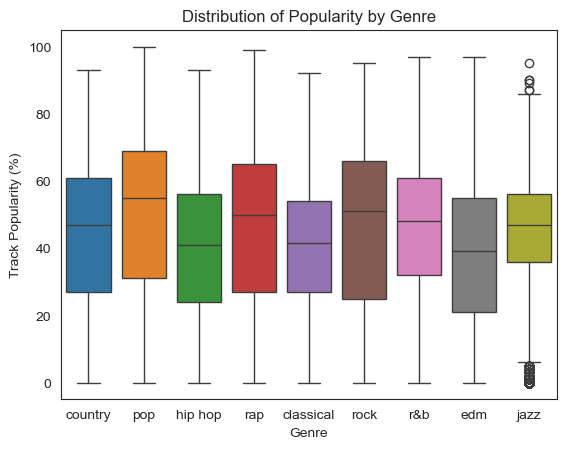

In [12]:
# Comparing distribution of popularity between genres
sns.set_palette("tab10")
sns.set_style("white")

xcol = "playlist_genre"
xcol2 = "Genre"
ycol = "track_popularity"

ax = sns.boxplot(data=df, x=xcol, y=ycol, hue=xcol)
ax.set_title("Distribution of Popularity by Genre")
ax.set_ylabel("Track Popularity (%)")
ax.set_xlabel("Genre")

df.groupby(xcol).max(ycol).track_popularity

**Things to Note**:
* Pop skews the highest overall, folowed by rap and rock.
* EDM skews the lowest overall, followed by classical and hip hop.
* Pop is the only genre with at least one track with a popularity score of 100.
* Jazz has the tightest distribution, and is the only genre with any outlier popularity values.

Text(0.5, 0.98, 'Distribution of Each Audio Feature')

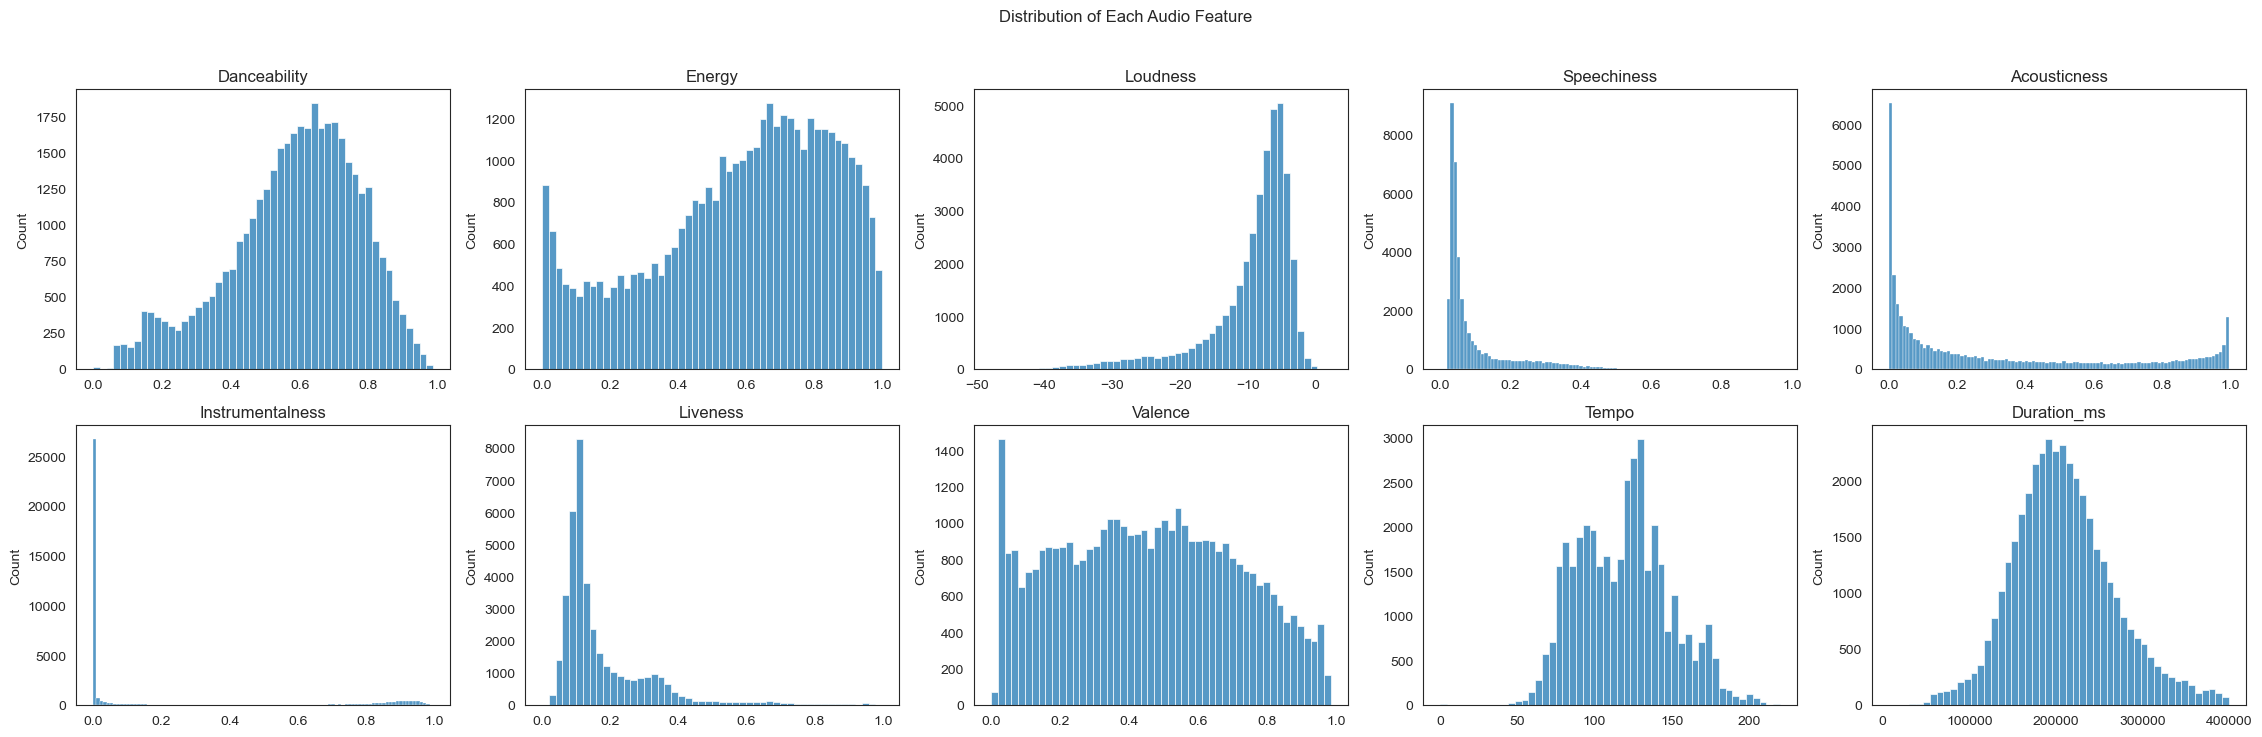

In [13]:
# Viewing histograms of each audio feature
sns.set_palette("tab10")
sns.set_style("white")

fig, axes = plt.subplots(2, 5, figsize=(28,8))

for col, ax in zip(df[audio_features], axes.flatten()):
    if col in ["speechiness", "acousticness", "instrumentalness"]:
        bins = 100
    else:
        bins = 50

    sns.histplot(data=df, x=col, ax=ax, bins=bins)
    ax.set_xlabel("")
    ax.set_title(col.capitalize())
    
plt.suptitle("Distribution of Each Audio Feature")

Text(0.5, 0.98, 'Distribution of Each Categorical Audio Feature')

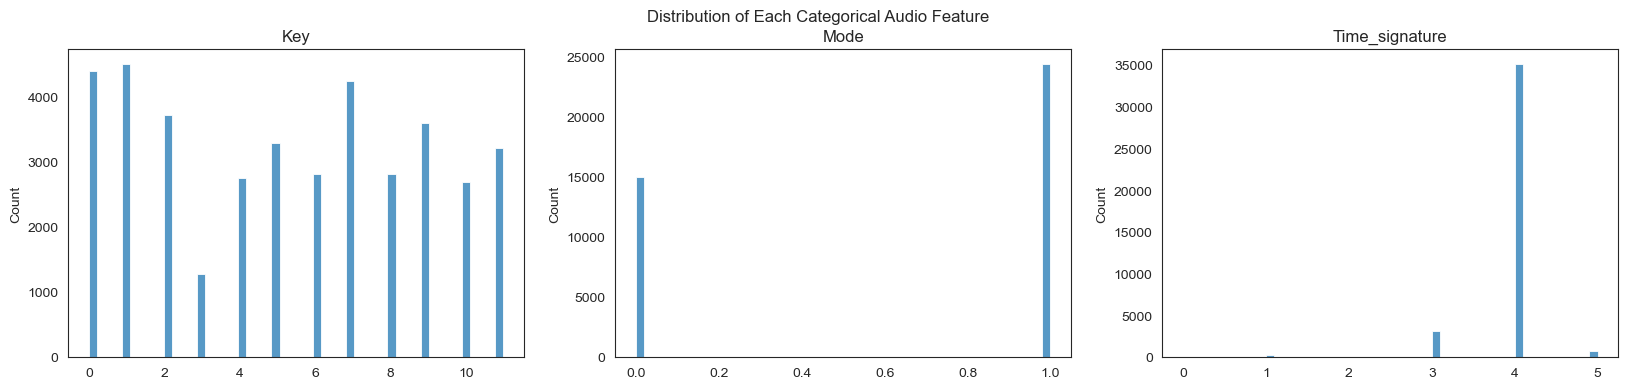

In [14]:
# Viewing histograms of each audio feature
sns.set_palette("tab10")
sns.set_style("white")

fig, axes = plt.subplots(1, 3, figsize=(20,4))

for col, ax in zip(df[audio_features_categorical], axes.flatten()):
    bins = 50
    sns.histplot(data=df, x=col, ax=ax, bins=bins)
    ax.set_xlabel("")
    ax.set_title(col.capitalize())
    
plt.suptitle("Distribution of Each Categorical Audio Feature")

**Things to Note**:
* Danceability, energy, and loudness are all left-skewed with increasing intensity
    * This indicates that most songs in the dataset have high danceability, energy, and loudness values
* Acousticness, speechiness, and instrumentalness are all incredibly right-skewed with increasing intensity
    * In fact, most songs in the dataset have around 0 instrumentalness, indicating that most songs in the dataset contain vocal elements.
    * There are noticeable secondary modes at the upper end of the scales for acousticness and instrumentalness
* Liveness and tempo both appear to be bimodal
    * Liveness has one mode around 0.1 and another around 0.325. However, it is also strongly right-skewed, indicating that most songs are not live.
    * Tempo has one mode just below 100 BPM, and another larger one at about 125/130 BPM
* Valence is fairly uniformly distributed across the entire scale , but there is a large peak near 0 and a large drop-off at 1.
* Duration has the most normal distribution after removing the extreme outlier values
* As key and mode are not on scales, they are a bit harder to analyze
    * Most songs appear to be in a major key
    * Each key is represented fairly well with one exception: relatively few songs are in key 3 (D#/Eb)
        * There are no songs in which the key was not recognized (per the documentation, these would have a key value of -1)
    * Most songs have a 4/4 time signature, though noticeable amounts have 3/4 and 5/4 time signatures

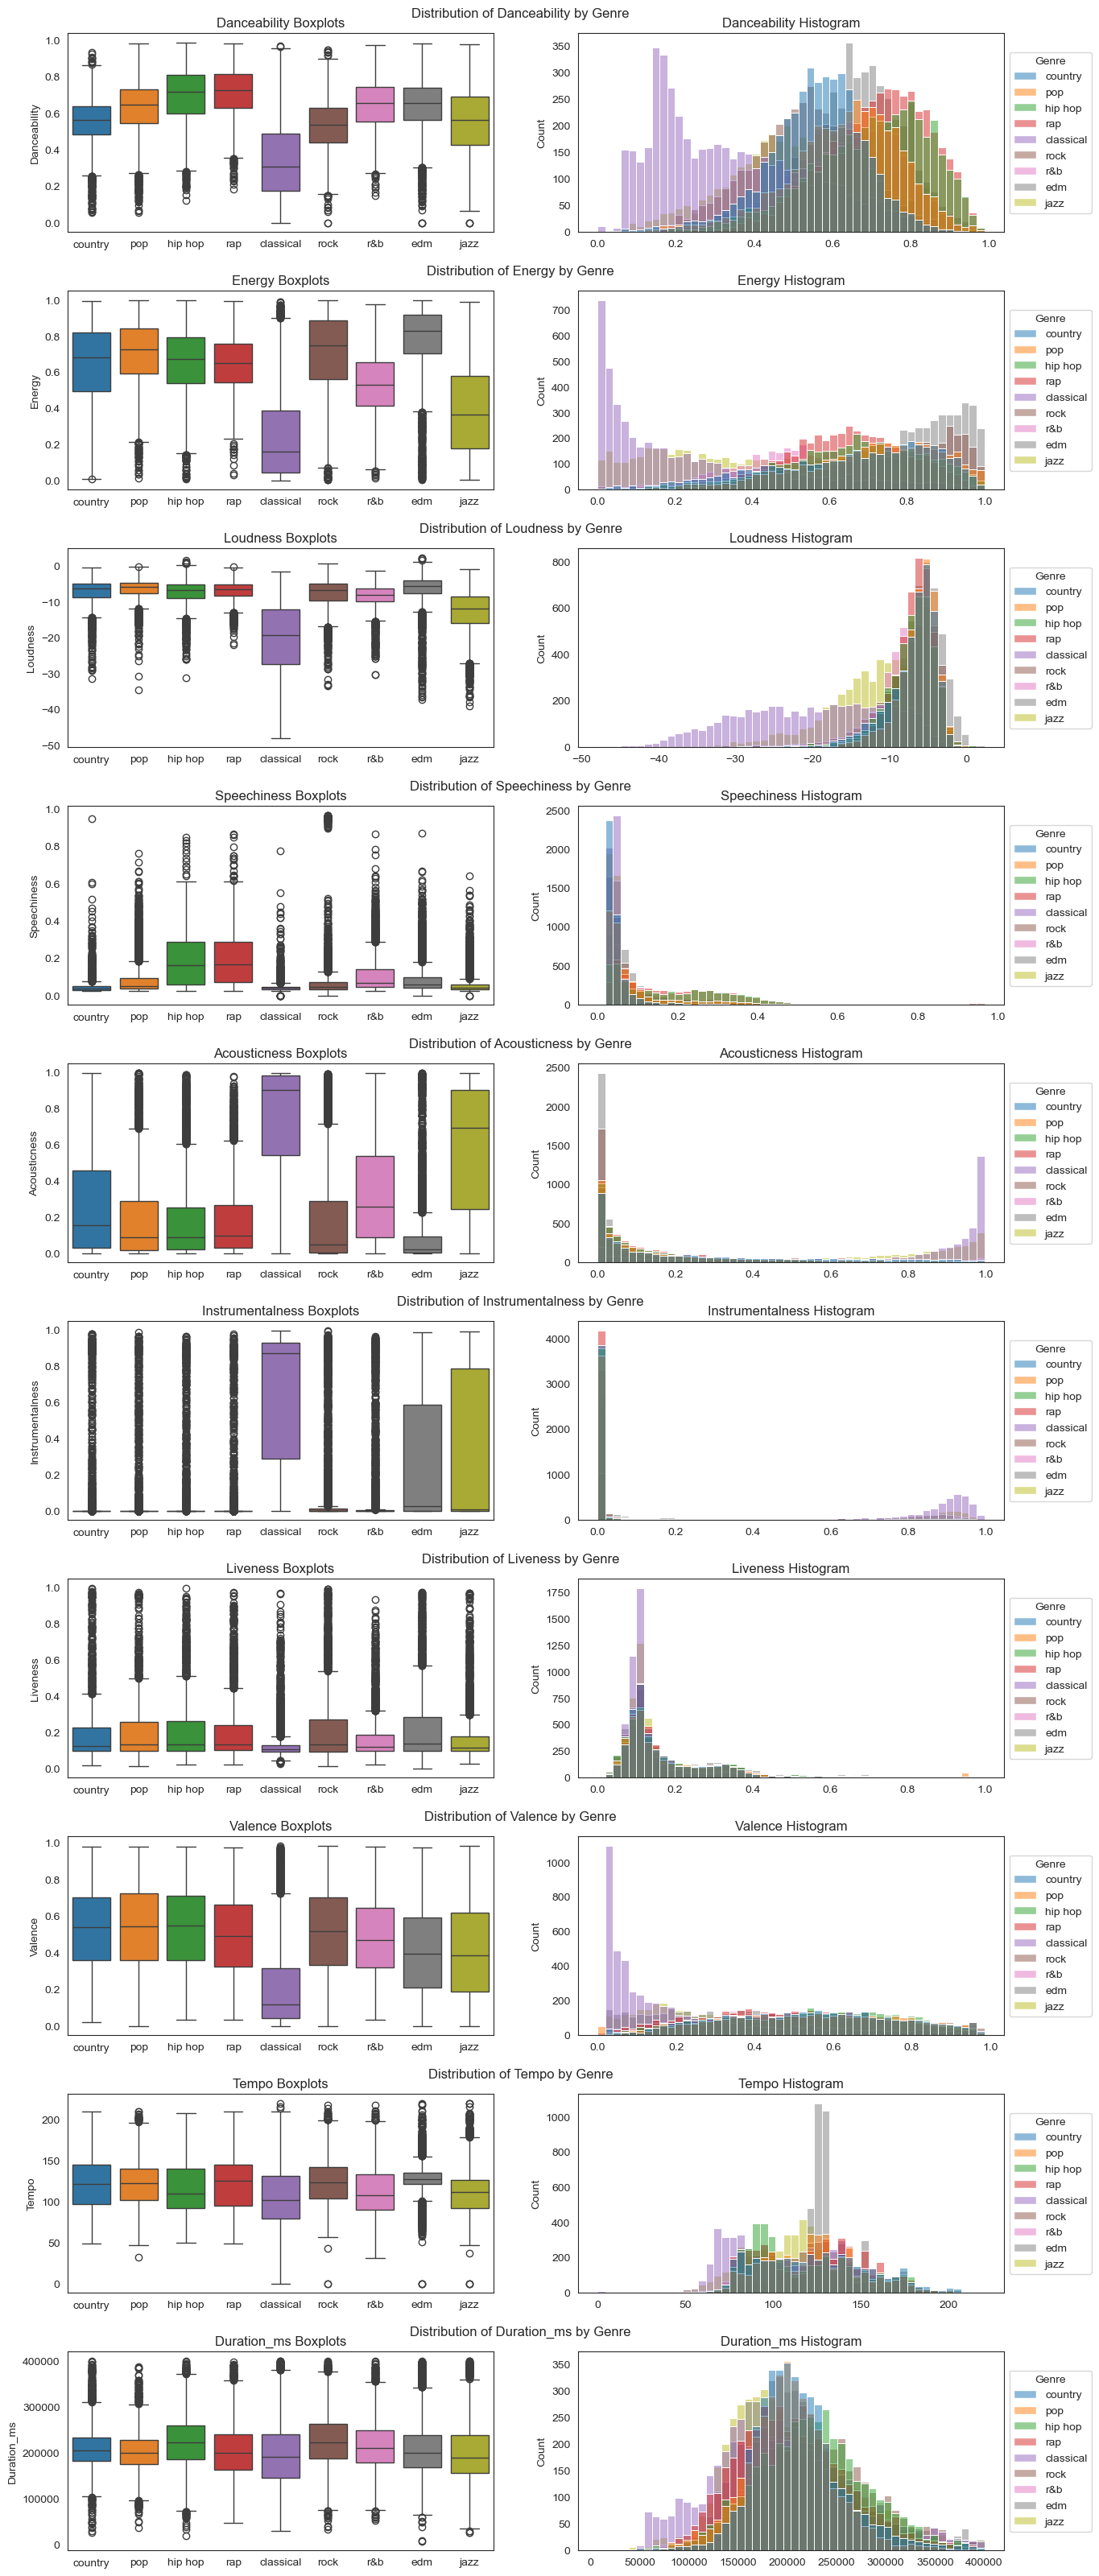

In [15]:
# Viewing histogram/boxplot pairings of each audio feature
sns.set_palette("tab10")
sns.set_style("white")

nrow_subfig = 10
ncol_subfig = 1
nrow_subplot = 1
ncol_subplot = 2
feats = [val for val in audio_features for i in range(ncol_subplot)]

df["Genre"] = df["playlist_genre"]
huecol = "Genre"

fig = plt.figure(figsize=(15,32))
subfigs = fig.subfigures(nrows=nrow_subfig, ncols=ncol_subfig)

for (i, (subfig, feature)) in enumerate(zip(subfigs, audio_features)):
    subfig.suptitle(f"Distribution of {feature.capitalize()} by Genre")
    axes = subfig.subplots(nrows=nrow_subplot, ncols=ncol_subplot)
    
    for (i, ax) in enumerate(axes.flatten()):
        if (i % 2):
            sns.histplot(data=df, x=feature, ax=ax, bins=50, hue=huecol)
            ax.set_xlabel("")
            ax.set_title(f"{feature.capitalize()} Histogram")
            sns.move_legend(ax, loc='center left', bbox_to_anchor=(1, 0.5))
            #plt._legend.set_title("Genre")
        else:
            sns.boxplot(data=df, x=huecol, y=feature, ax=ax, hue=huecol)
            ax.set_xlabel("")
            ax.set_ylabel(f"{feature.capitalize()}")
            ax.set_title(f"{feature.capitalize()} Boxplots")
            ax.legend([], frameon=False)


***Things to Note**:

* Classical seems to have very unique feature distributions, more than any other genre. It appears to be quieter, have lower energy, danceability, and valence, and have higher acousticness and isntrumentalness. It also has a notiecably skinny distribution at the low end of liveness.
* Jazz is also fairly distinct with its higher instrumentalness and acousticness, but also with its mid-range loudness and lower energy.
* EDM has a high instrumentalness and a very tight tempo distribution centered around 125 BPM.
* Country and R&B both had fairly high acousticness
* Hiphop and Rap both had relatively high speechiness

Text(0.5, 1.0, 'Correlation Between Popularity and Numeric Audio Features')

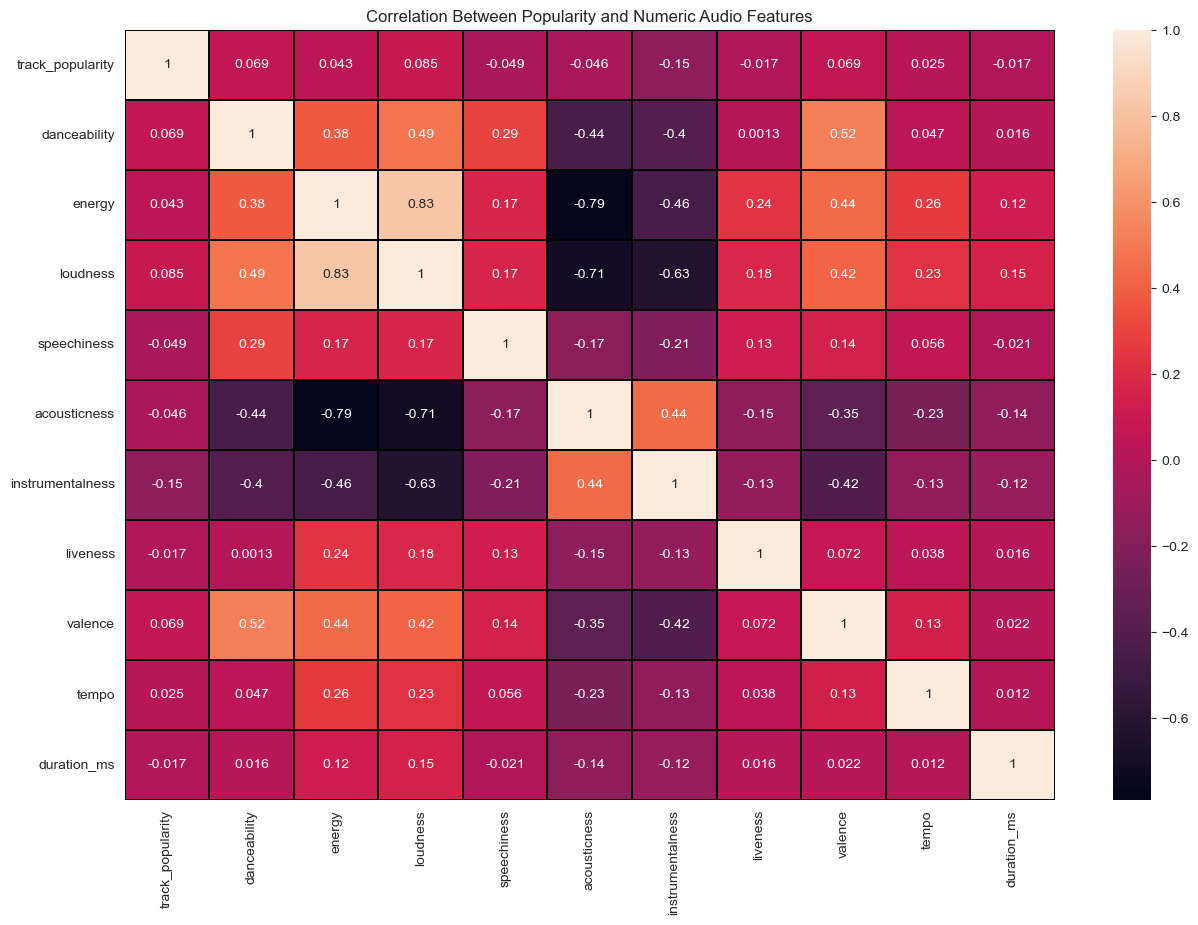

In [16]:
# Build the correlation plot
sns.set_palette("tab10")
sns.set_style("white")

sns.set_palette("tab10")
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(data=df[["track_popularity"] + audio_features].corr(), annot=True, linecolor="black", linewidth=0.05)
ax.set_title("Correlation Between Popularity and Numeric Audio Features")

**Things to Note**:

* Most of the features have almost no correlation with each other with a few exceptions (pairings listed below):
    * Strong positive (0.5, 1)
        * Danceability / Valence
        * Loudness / Energy
    * Weak positive (0.25, 0.5)
        * Danceability / Loudness
        * Danceability / Energy
        * Danceability / Speechiness
        * Energy / Valence
        * Energy / Tempo
        * Loudness / Valence
        * Acousticness / Instrumentalness
    * Weak negative (-0.25, -0.5)
        * Danceability / Acousticness
        * Danceability / Instrumentalness
        * Instrumentalness / Energy
        * Valence / Acousticness
        * Valence / Instrumentalness
    * Strong negative (-0.5, -1)
        * Acousticness / Energy
        * Acousticness / Loudness
        * Instrumentalness / Loudness

* **Key Takeaways**
    * No features really correlate with popularity, though there is a slight negative correlation with instrumentalness (-0.15)
    * Loud songs tend to be very energetic with more electronic and vocal elements
    * Danceable songs typically have higher energy, are louder, have more speech content, and are typically happier. They also have more electronic and vocal elements
    * Songs that are mostly instrumental are typically quieter
    * Songs that have more acoustic elements are typically quieter and less energetic

## Step 3:  Identify 3 research questions

# 1. How has the popularity of each genre changed over time? 

## Introduction
According to Spotify's web API documentation, track popularity is calculated using an algorithm that mainly relies on two statistics:

1. The total number of plays for a given track ID
2. The total number of *recent* plays for a given track ID which is given a higher weight

Thus, the popularity statistic measures how currently popular a given track is, i.e., if an older track has a relatively high popularity value, it either was extremely popular in the past, is still popular today relative to other older tracks, or both. In this analysis, I explore genre popularity under two different definitions:

1. **Definition 1**: High total number of tracks with a popularity score above some percentile in the dataset for a given genre over a given time period
    1. This will give me an idea of how popular recent releases are as well as how currently popular older releases are relative to other older releases.
2. **Definition 2**: High average popularity of tracks released over some time interval for a given genre
    1. This will give me an idea of how popular a genre is relative to the quantity of releases for that genre at some point in time.
    2. If the dataset is first filtered to only show track with a popularity score above some percentile, this will also give me an idea of popularity differences between genres at some point in time.

Since I've only sampled the database, and also since many older tracks may not be stored on Spotify, I chose to start the time interval of interest at 1970 as there is too little data before this year to make solid conclusions. 

#### Tasks:
* **1.1**: Find which genres have the largest numbers of tracks with popularity above 75% for each decade.
* **1.2**: Find the genre split between the top 100 songs of each year.
* **1.3**: Find the mean popularity of each genre across each decade

#### Visualizations:
1. **Side-by-Side Bar Plot**: Shows the total number of tracks with a popularity value above 75 for each genre for each decade between 1970 and 2020.
2. **Line Plot**: The top 230 most popular tracks for every year from 1970-2020 grouped by genre.
3. **Line Plot**: The mean popularity of tracks for each genre for each decade between 1970 and 2020.


## Preprocessing

For this analysis, I converted the album release dates to years to simplify the analysis.

## 1.1: Find which genres have the largest numbers of tracks with popularity above 75% for each decade.

In [17]:
# Getting the popularity cutoff
#popularity_cutoff = df["track_popularity"].quantile(0.75)
popularity_cutoff = 75

In this visualization, all tracks above a popularity score of 0.75 are displayed for each time period.


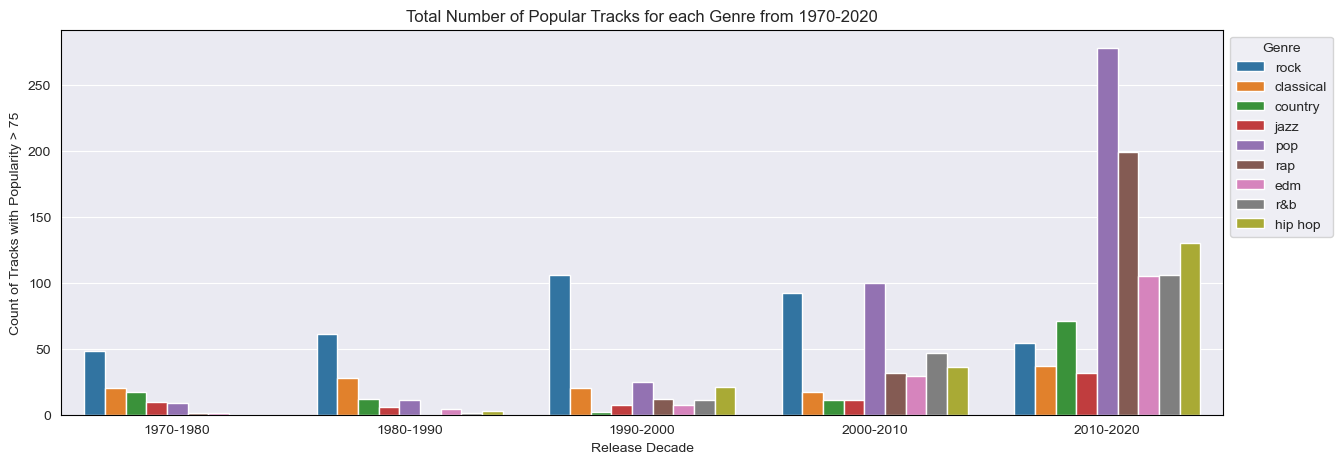

In [18]:
# Plotting genre popularity for each decade
sns.set_palette("tab10")
sns.set_style("darkgrid", {"axes.linewidth":2 , "axes.edgecolor":"black"})

# Variables
year_start = 1970
year_end = 2020
year_range = 10
num_features_displayed = len(list(df["playlist_genre"].unique()))

# Discretizing the range
bins = range(year_start, year_end+1, year_range)
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(0, len(bins)-1)]
df_1 = df.copy()
df_1.drop(columns=audio_features[:] + audio_features_categorical[:], inplace=True)
df_1["album_release_date"] = df_1["album_release_date"].str.slice(stop=4).astype("int")
df_1 = df_1.loc[(df_1["album_release_date"]>=year_start) & (df_1["album_release_date"]<=year_end), :]

# Converting years and discretizing them into bins
df_1["album_release_period"] = pd.cut(df_1["album_release_date"], bins=bins, labels=labels)

# Filtering by popularity and bin
df_1_popularityFiltered = df_1.loc[(df_1["track_popularity"] >= popularity_cutoff), :].copy()

# Grouping the rows
df_1_grouped = pd.DataFrame(df_1_popularityFiltered.groupby(by=["album_release_period", "playlist_genre"]).count().iloc[:,0])
df_1_grouped.reset_index(inplace=True)
df_1_grouped.rename(columns={"album_release_period":"Release_Period", "playlist_genre":"Genre", "track_id":"Count"}, inplace=True)

# Filter out 0 counts, show some number of genres (Currently using all genres)
df_1_grouped = df_1_grouped.sort_values(by=["Count"], ascending=False).groupby("Release_Period").head(num_features_displayed).sort_values(["Release_Period", "Count"], ascending=[True, False]).reset_index(drop=True)

# Plotting
sns.set_palette("tab10")
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax = sns.barplot(data=df_1_grouped, x="Release_Period", y="Count", hue="Genre")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
ax.set_title(f"Total Number of Popular Tracks for each Genre from {year_start}-{year_end}")
ax.set_xlabel("Release Decade")
ax.set_ylabel(f"Count of Tracks with Popularity > {popularity_cutoff}")

print("In this visualization, all tracks above a popularity score of 0.75 are displayed for each time period.")


**Things to Note**:
* Between 1970 and 2000, Rock had the highest quantity of popular tracks by large margins
* Between 2000 and 2010, Pop overtook Rock, though the counts were fairly comparable
* Between 2010 and 2020, Pop was the most dominant genre followed by rap.
    * EDM, R&B, and Hip hop each grew in popularity as well
    * Rock declined to one of the least popular genres in this range

## 1.2: Find the genre split between the top 200 songs of each year.

In this visualization, only the top 200 tracks from each year are displayed to focus on the genre makeup of the most popular tracks.


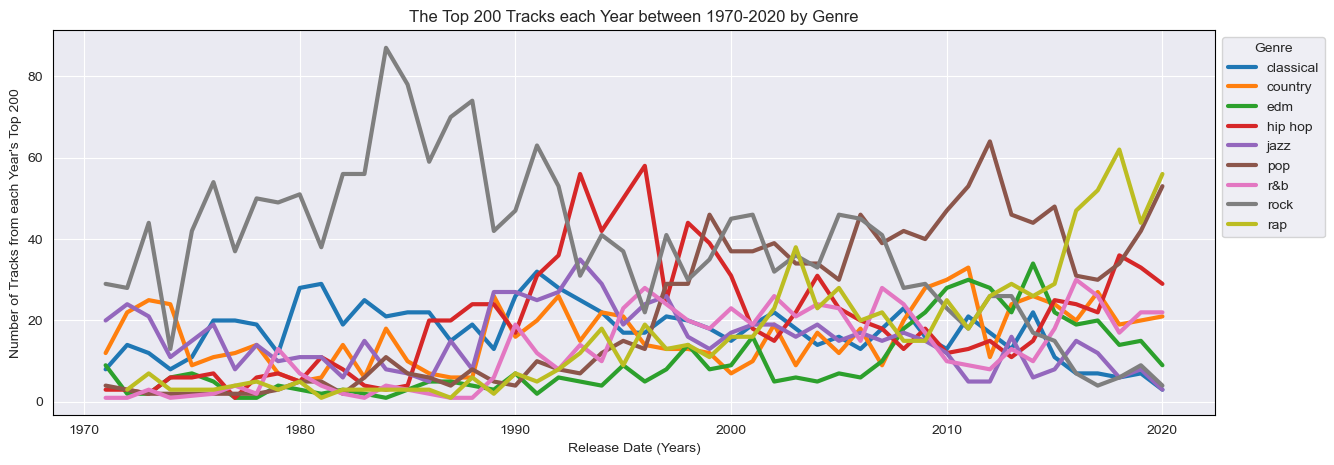

In [19]:
# Getting the top 100 popularity tracks from each time period
sns.set_palette("tab10")
sns.set_style("darkgrid", {"axes.linewidth":2 , "axes.edgecolor":"black"})

# Variables
year_start = 1970
year_end = 2020
#year_range = 1
period_sample_size = 200

# Discretizing the range
bins = range(year_start, year_end+1, year_range)
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(0, len(bins)-1)]
df_1 = df.copy()
df_1.drop(columns=audio_features[:] + audio_features_categorical[:], inplace=True)
df_1["album_release_date"] = df_1["album_release_date"].str.slice(stop=4).astype("int")

# Filtering out for time range and minimum popularity
df_1 = df_1.loc[(df_1["album_release_date"]>year_start) & (df_1["album_release_date"]<=year_end),:]# & (df_1["track_popularity"] >= popularity_cutoff), :]

# Converting years and discretizing them into bins
#df_1["album_release_period"] = pd.cut(df_1["album_release_date"], bins=bins, labels=labels)

# Get the top N songs for each time period, then group by time period and genre to get counts
df_1_topNbyPeriod = df_1.sort_values(by="track_popularity", ascending=False).groupby("album_release_date").head(period_sample_size).groupby(["album_release_date", "playlist_genre"]).count().iloc[:,1]
df_1_grouped = df_1_topNbyPeriod.reset_index().rename(columns={"album_release_date":"Release_Date", "playlist_genre":"Genre", "track_popularity":"Number_of_Tracks"})

# Plotting
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax = sns.lineplot(data=df_1_grouped, x="Release_Date", y="Number_of_Tracks", hue="Genre", linewidth=3)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
ax.set_title(f"The Top {period_sample_size} Tracks each Year between {year_start}-{year_end} by Genre")
ax.set_xlabel("Release Date (Years)")
ax.set_ylabel(f"Number of Tracks from each Year's Top {period_sample_size}")

print("In this visualization, only the top 200 tracks from each year are displayed to focus on the genre makeup of the most popular tracks.")


**Things to Note**:
* From 1970-2000, Rock made up the highest proportion of the top tracks, but by 2020, it had one of the smallest proportions
    * After 2000, Rock has been trending downward.
* After 1990, Pop made up an increasing proportion of the top tracks, becoming the dominant genre in the late 2000s generally, though 2015-2020 shows a notable drop-off in its proportion of the top 500 tracks.
* After 2010, Rap started trending and actually spiked above Pop in the late 2010s.
* In the 1990s, there was a spike in popular hip hop tracks.

## 1.3: Find the mean popularity of each genre across each decade

In this visualization, the mean popularity across all tracks released in a given time period for a given genre is plotted


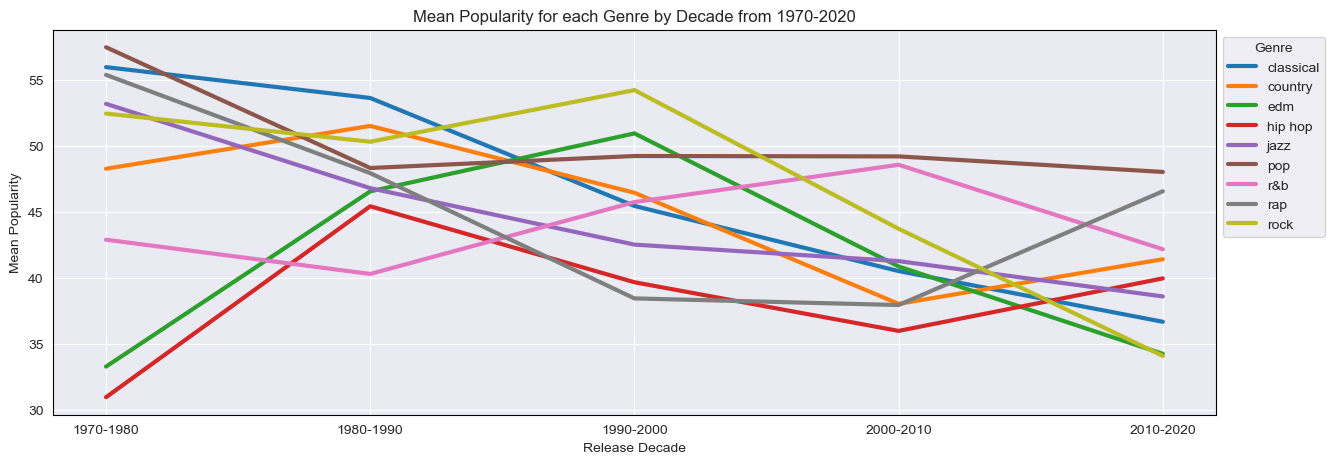

In [20]:
# Plotting mean genre popularity from 1950-2020
sns.set_palette("tab10")
sns.set_style("darkgrid", {"axes.linewidth":2 , "axes.edgecolor":"black"})

# Variables
year_start = 1970
year_end = 2020
year_range = 10

# Discretizing the range
bins = range(year_start, year_end+1, year_range)
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(0, len(bins)-1)]
df_1 = df.copy()
df_1.drop(columns=audio_features[:] + audio_features_categorical[:], inplace=True)
df_1["album_release_date"] = df_1["album_release_date"].str.slice(stop=4).astype("int")
df_1 = df_1.loc[(df_1["album_release_date"]>year_start) & (df_1["album_release_date"]<=year_end), :]
df_1["album_release_period"] = pd.cut(df_1["album_release_date"], bins=bins, labels=labels)

# Grouping the rows
df_1_grouped = pd.DataFrame(df_1.groupby(by=["playlist_genre", "album_release_period"]).mean().iloc[:,0])
df_1_grouped = df_1_grouped.reset_index().rename(columns={"album_release_period":"Release_Date", "playlist_genre":"Genre", "track_popularity":"Mean_Popularity"})

# Plotting
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax = sns.lineplot(data=df_1_grouped, x="Release_Date", y="Mean_Popularity", hue="Genre", linewidth=3)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
ax.set_title(f"Mean Popularity for each Genre by Decade from {year_start}-{year_end}")
ax.set_xlabel("Release Decade")
ax.set_ylabel("Mean Popularity")

print("In this visualization, the mean popularity across all tracks released in a given time period for a given genre is plotted")

**Things to Note**:
* In the 1970s, the genres with the highest average popularity scores were pop, country, rap, classical, rock, and jazz.
* In the 1990s, the genres with the highest average popularity scores were rock, pop, edm, country, and r&b.
* In the 2000s, the genres with the highest average popularity scores were pop and r&b.
* In the 2010s, the genres with the highest average popularity scores were pop and rap with R&B dropping. Here, Rock has one of the lowest average popularity values.

Unlike in the other visualizations, R&B had a very noticeable spike in the 2000s when its average popularity rivaled Pop. EDM also had a noticeable spike in the 1990s, even surpassing Pop to become the 2nd-most popular genre on average.

## Objective 1: Conclusion

#### How has the popularity of each genre changed over time? 

The conclusion differs based on the chosen metric of popularity. If only analyzing songs above some popularity value as in visualizations 1 and 2, there are some clear conclusions that can be made:
1. Rock was a dominant genre from the 1970s to the 2000s as it made up the largest proportion of the top 200 most popular tracks in this era. It also had the largest number of popular songs released in the 70s and 80s overall.
2. Pop became a more dominant genre in the 1990s, and by the 2000s, it made up the largest proportion of the top 200 most popular tracks. Its average overall popularity was also the highest from 2000 onward. 
3. Rap became a more dominant genre in the 2010s, and is currently rivaling pop as a dominant genre today.

However, if analyzing the mean popularity across ALL tracks of each genre as in visualization 3, then the conclusions are a bit more nuanced:
1. The most popular genres in the 1970s were Pop, Country, Rap, and Classical. While Rock still had a high average popularity, it is notably smaller than the others.
2. The most popular genres in the 1990s were Rock, Pop, EDM, and Country/R&B.
3. The most popular genres in the 2010s were Pop, R&B and Rap.

I believe this discrepancy is because while the first two visualizations focused on the top tracks of each era, the third visualization takes into account the quantity of tracks released in each era. While the top songs from the 1970s-2000s may have been Rock, the data seems to suggest that either large quantities of Rock songs were unpopular which brought down its overall mean., or that other genres had higher popularity distributions which brought up their respective overall means. This aside, however, there is still a fairly clear trend in the period betwen 2000 and 2020 shown in all 3 visualizations: Rock appears to be dropping in popularity relative to other genres at a fairly fast rate, while Pop and Rap are becoming dominant genres.

#### Important Considerations
It is important to remember three important caveats to this dataset that impact these conclusions:
1. This dataset is queried from Spotify's database, so any tracks that were never released on Spotify are **not** recorded. This especially affects older tracks which were released before Spotify even existed.
2. Specifically, the tracks in this dataset were pulled by querying for genre keywords and extracting playlists rather than directly querying for tracks tied to a specific genre. This means that only tracks that have been added to a playlist with the genre keyword in the name or description may appear in the dataset, potentially leaving out many lesser-known tracks. Also, this assumes that each playlist only contains tracks of its associated genre - since many playlists are user-generated, this may not be entirely accurate.
3. Popularity is calculated according to both the overall number of plays and the number of recent plays, with the recent plays being weighted higher. Since recent plays are important, then an analysis on genre popularity likely becomes less accurate the further back in time that the analysis goes.

# 2. Can you predict the genre of a song from its audio features? If so, which features are the most important in the prediction?

## Introduction
According to Spotify's web API documentation, most of the audio features as recorded in audio_df are calculated via algorithms. Many of them do not represent actual values, only probabilities of occurrences - for example, speechiness represents the probability that the track contains only speech based on certain qualities of the recording. If these calculated features can accurately and uniquely describe each genre, then the genre should be reasonably predicted using a machine learning algorithm.

For this analysis, I will create a decision tree model that will attempt to classify the genre of a given track based on this dataset. Judging from the overall lack of difference in each genre's audio feature distributions plotted earlier in the data exploration phase, I predict that the model may not work very well. I also predict that the model will have higher classification accuracy for the classical, jazz, and EDM genres as these three genres often had unique audio feature distributions.

#### Tasks:
* **2.1**: Predicting genre with a decision tree classifier
* **2.2**: Determining the most important features in the decision tree classification
* **2.3**: Comparing the performance of the decision tree classifier with that of a random forest classifier

#### Visualizations:
1. **Bar Plot**: Viewing classification accuracy between the training and test sets for each class value 
2. **Decision Tree**: Viewing the output decision tree used in the model
3. **Bar Plot**: Viewing the most important features for classification
4. **Side-by-Side Bar Plots**: Comparing model accuracy between decision tree and random forest models.

#### Model Hyperparameters:
* These are shared between the decision tree and random forest models
    * max_leaf_nodes: determines how many leaves are allowed in the model
    * random_state: for predictable results
    * min_samples_split: determines how many instances must reach a node before it is allowed to split
    * criterion: determine what function is used to choose the feature to split on
        * For this analysis, I used log_loss which appeared to most accurately classify the data
    * min_samples_leaf: determines the minimum number of instances that must be at a leaf node before it can split

## Preprocessing
I will create a data frame of track IDs with corresponding audio features, then filter out categorical features as well as features which had 0 importance during my early tests - removing them actually improved the model somewhat. I will also scalexcol the features using FeatureScaler(). Once the data frame is initialized, I will split it into an input X matrix and y vector

In [21]:
# These variables had no importance in earlier testing and should be removed to simplify the models
unnecessary_variables = ["liveness", "key", "time_signature", "mode"]#, "duration_ms", "tempo", "valence"]

# Variables
seed = 100
max_leaf_nodes = int(round((audio_df.shape[1] - len(unnecessary_variables))*4, 0))  # This is number of audio features minus unnecessary variables * n rounded to the nearest whole number
min_samples_split = 500
criterion = "log_loss"
min_samples_leaf = 100

# Creating the test/train X/y variables
classification_columns = list(audio_df.columns)
classification_columns.remove("track_id")
classification_columns.append("playlist_genre")
model_classification_columns = [feature for feature in classification_columns if feature not in unnecessary_variables]

df_2 = df.loc[:,model_classification_columns].copy()

In [22]:
# Preprocessing - Scaling/discretizing the features
X = df_2.drop(columns="playlist_genre")
y = df_2["playlist_genre"]

X_normalized = X.copy()
scaler = StandardScaler()

for feature in X.columns:
    X_normalized[feature] = scaler.fit_transform(X.loc[:, [feature]])

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=seed)

## 2.1: Creating a decision tree model

In [23]:
model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, criterion=criterion, random_state=seed, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_leaf_nodes=40,
                       min_samples_leaf=100, min_samples_split=500,
                       random_state=100)

In [24]:
y_train_predictions = model.predict(X_train)
print(f"Overall accuracy for train data: {round(accuracy_score(y_true = y_train, y_pred = y_train_predictions) * 100, 2)}%\n")

y_test_predictions = model.predict(X_test)
print(f"Overall accuracy for test data: {round(accuracy_score(y_true = y_test, y_pred = y_test_predictions) * 100, 2)}%\n")

Overall accuracy for train data: 40.77%

Overall accuracy for test data: 40.29%



In [25]:
# Create a function that will output a data frame containing the model accuracy by genre
def accuracy_score_by_genre(y_true, y_pred, output_colName = "Accuracy"):
    predictions_df = pd.concat([y_true, pd.Series(y_pred, index=y_true.index)], axis=1)
    predictions_df.rename(columns={"playlist_genre":"Actual", 0:"Predicted"}, inplace=True)

    genre_predictions = {}
    for genre in y_true.unique():
        correct = predictions_df[(predictions_df["Actual"]==genre) & (predictions_df["Predicted"]==genre)].shape[0]
        total = predictions_df[(predictions_df["Actual"]==genre)].shape[0]
        genre_predictions[genre] = round((correct/total), 3)
    genre_predictions_df = pd.DataFrame.from_dict({output_colName:genre_predictions}, orient="Index")
    genre_predictions_df = genre_predictions_df.T.sort_values(by=output_colName)
    
    return genre_predictions_df

(0.0, 1.0)

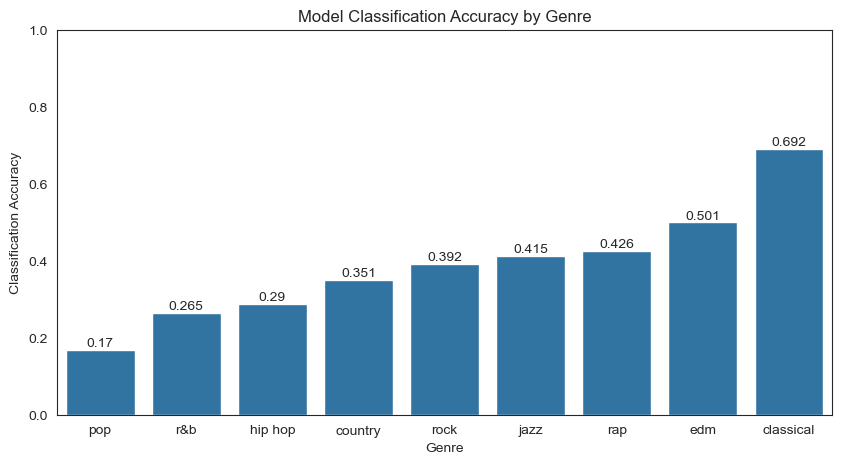

In [26]:
# Compare accuracies by genre
sns.set_palette("tab10")
sns.set_style("white")

output_colName="dtree_accuracy"
genre_predictions_test_df = accuracy_score_by_genre(y_true=y_test, y_pred=y_test_predictions, output_colName=output_colName)

fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax = sns.barplot(data=genre_predictions_test_df, x=genre_predictions_test_df.index, y=output_colName)
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_title("Model Classification Accuracy by Genre")
ax.set_ylabel("Classification Accuracy")
ax.set_xlabel("Genre")
ax.set_ylim(0, 1)

**Things to Note**:
* The model seems to classify Classical music the best with an accuracy of about 69%. It appears to classify Pop the worst with an accuracy of about 17%. 
* There is very little difference in the classification results between the training and test sets

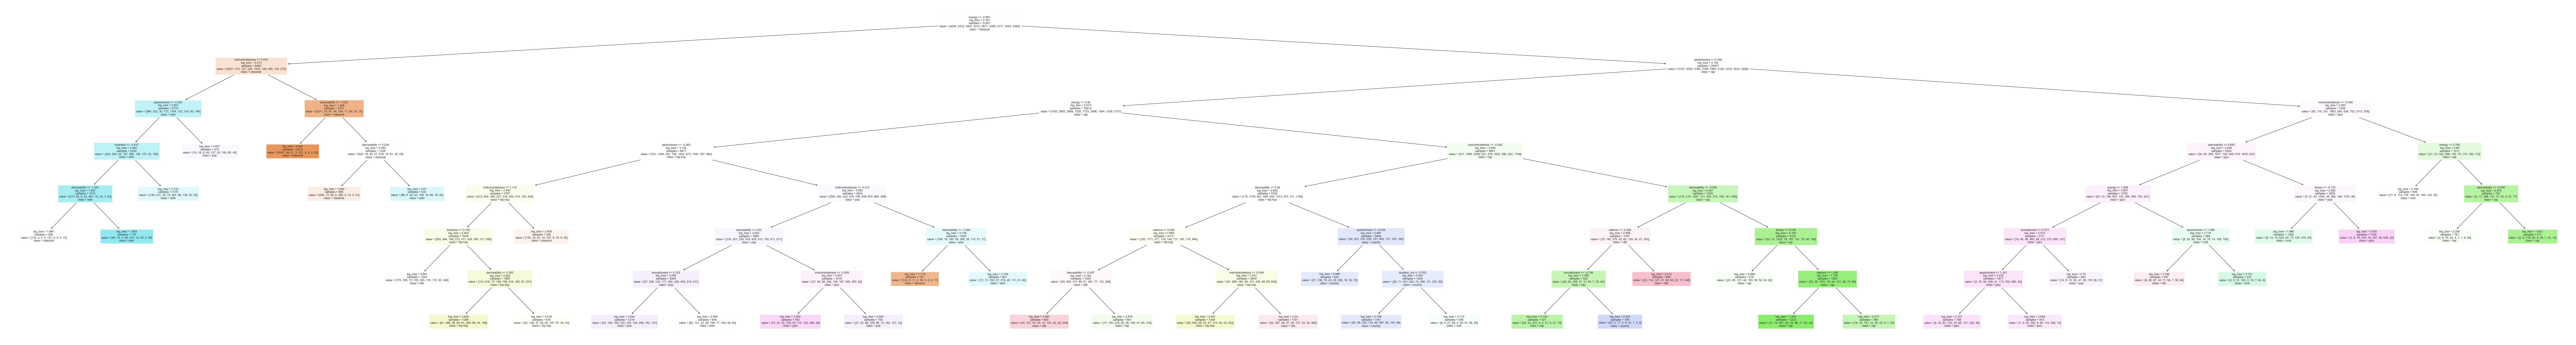

In [27]:
# Plotting the tree
sns.set_palette("tab10")
sns.set_style("white")

fig, axes = plt.subplots(1, 1,figsize = (150,20))
plot_tree(model, feature_names = list(X_normalized.columns), class_names=list(y_test.unique()), filled = True);


**Things to Note**:
* As the tree is fairly large, it is difficult to interpret. However, Energy seems to be the most important feature as it is used in the root node, followed by Instrumentalness and Speechiness in the next child nodes.

## 2.2: Determining the most important features in the decision tree classification

The top 3 most important features:
energy              0.393371
speechiness         0.225500
instrumentalness    0.189368
dtype: float64


Text(0, 0.5, 'Feature Importance')

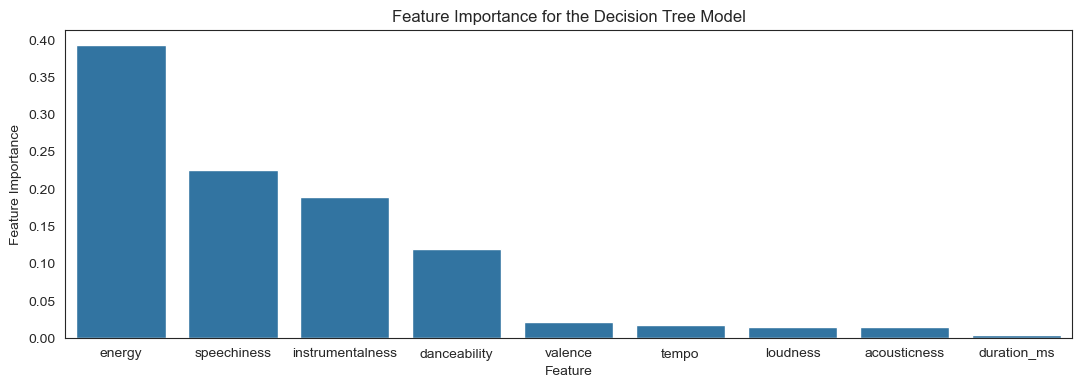

In [28]:
# Feature importance bar plot
sns.set_palette("tab10")
sns.set_style("white")

feat_importances = pd.Series(data = model.feature_importances_, index = X_normalized.columns).sort_values(ascending = False)
print("The top 3 most important features:")
print(feat_importances.head(3))

fig,ax = plt.subplots(1,1, figsize=(13,4))
ax = sns.barplot(y = feat_importances, x = feat_importances.index)
ax.set_title("Feature Importance for the Decision Tree Model")
ax.set_xlabel("Feature")
ax.set_ylabel("Feature Importance")

**Things to Note**:
* The feature importance bar plot confirms that loudness was the most significant feature followed by speechiness and danceability/instrumentalness
* Energy is the 5th most important feature while every other feature has extremely low importance.
* The least important feature is duration_ms, which makes sense given that each genre had very similar distributions except the outlier values.

## 2.3: Comparing the performance of the decision tree classifier with that of a random forest classifier

In [29]:
n_estimators = 200
seed = 100
max_leaf_nodes = int(round((audio_df.shape[1] - len(unnecessary_variables))*4, 0))  # This is number of audio features minus unnecessary variables * n rounded to the nearest whole number
min_samples_split = 500
min_samples_leaf = 100
criterion = "gini"
max_features = "sqrt"

model_2 = RandomForestClassifier(n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes, min_samples_leaf=min_samples_leaf, criterion=criterion, random_state=seed, max_features=max_features)
model_2.fit(X_train, y_train)

output_colName_2="rf_accuracy"
y_test_predictions_2 = model_2.predict(X_test)

print(f"Overall accuracy for test data using the random forest model: {round(accuracy_score(y_true = y_test, y_pred = y_test_predictions_2) * 100, 2)}%\n")
genre_predictions_test_df_2 = accuracy_score_by_genre(y_true=y_test, y_pred=y_test_predictions_2, output_colName=output_colName_2)

Overall accuracy for test data using the random forest model: 45.25%



Text(0, 0.5, 'Classification Accuracy')

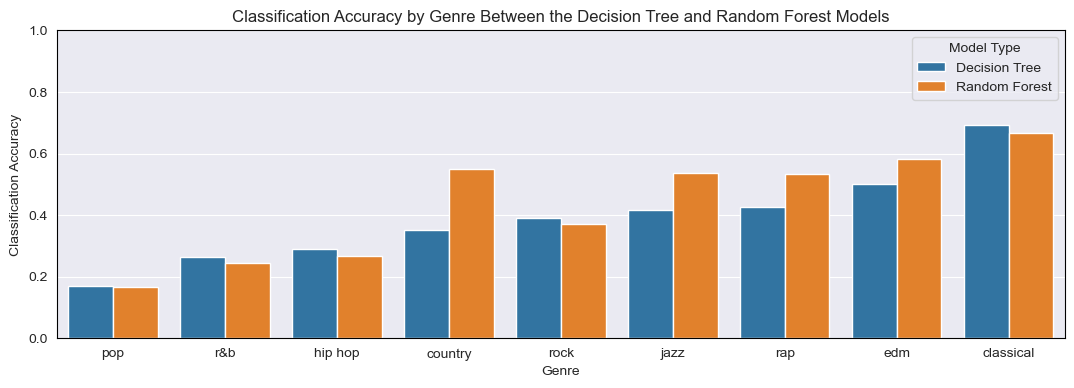

In [30]:
sns.set_palette("tab10")
sns.set_style("darkgrid", {"axes.linewidth":2 , "axes.edgecolor":"black"})

feat_importances
genre_predictions_compare = pd.concat([genre_predictions_test_df, genre_predictions_test_df_2], axis=1)

genre_predictions_compare = genre_predictions_compare.rename(columns={"dtree_accuracy":"Decision Tree", "rf_accuracy":"Random Forest"}).unstack().reset_index().rename(columns={"level_0":"Model Type", "level_1":"Genre", 0:"Accuracy"})

fig, ax = plt.subplots(1,1, figsize = (13,4))
sns.barplot(data=genre_predictions_compare, x="Genre", y="Accuracy", hue="Model Type", ax=ax)
ax.set_ylim(0,1)
ax.set_title("Classification Accuracy by Genre Between the Decision Tree and Random Forest Models")
ax.set_ylabel("Classification Accuracy")

**Things to Note**:
* The Random Forest model performed much better on the Country, Jazz, Rap, and EDM instances, but performed similarly or worse on everything else (including Classical)

### Comparing the most important features between the Decision Tree and Random Forest models

The top 3 most important features for Random Forest:
instrumentalness    0.187009
energy              0.176026
speechiness         0.150966
dtype: float64


Text(0.5, 0, 'Feature')

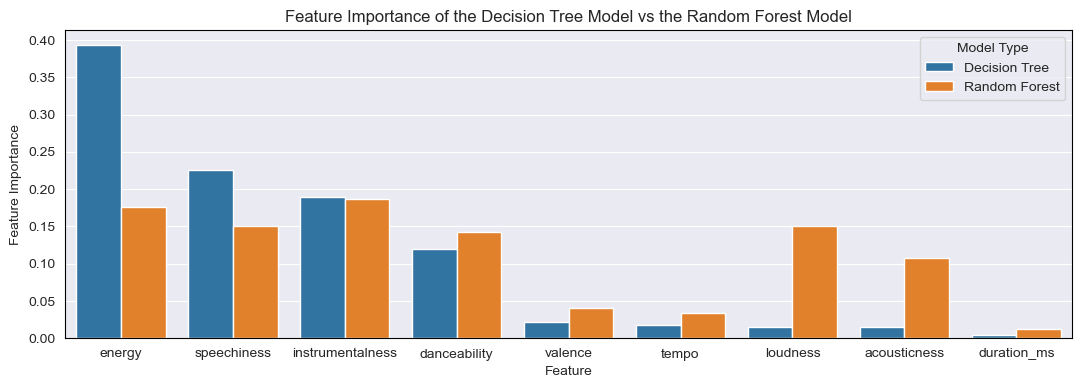

In [31]:
# Feature importance bar plot
sns.set_palette("tab10")
sns.set_style("darkgrid", {"axes.linewidth":2 , "axes.edgecolor":"black"})

feat_importances_rf = pd.Series(data = model_2.feature_importances_, index = X_normalized.columns).sort_values(ascending = False)
feat_importances_compare = pd.concat([feat_importances, feat_importances_rf], axis=1)

feat_importances_compare = feat_importances_compare.rename(columns={0:"Decision Tree", 1:"Random Forest"}).unstack().reset_index().rename(columns={"level_0":"Model Type", "level_1":"Feature", 0:"Feature Importance"})

print("The top 3 most important features for Random Forest:")
print(feat_importances_rf.head(3))
fig,ax = plt.subplots(1,1, figsize=(13,4))
ax = sns.barplot(data=feat_importances_compare, x="Feature",  y="Feature Importance", hue="Model Type")
ax.set_title("Feature Importance of the Decision Tree Model vs the Random Forest Model")
ax.set_ylabel("Feature Importance")
ax.set_xlabel("Feature")


**Things to Note**:
* While the decision tree relied very heavily on Energy, Random Forest was fairly evenly split between Instrumentalness and Energy. Overall though, Random Forest found Instrumentalness to be the most important feature.
* While the decision tree utilized Energy almost twice as much, Random Forest relied much more on Loudness and Acousticness.
* Both models utilized Tempo, Valence, and Duration the least, indicating that these features were the least important and could probably be removed from the models entirely.

## Objective 2: Conclusion

#### Can you predict the genre of a song from its audio features?
It appears that no, you cannot classify a song solely based on its audio features, though the results vary greatly according to the genre of the song. Only one genre was classified correctly at a relatively high rate (Classical with an accuracy 65%), but even that accuracy was not very high. Rock and EDM were the next highest, but the accuracies were about 50%, similar to simply random guessing. The decision tree performed much worse than random guessing on every other genre, Pop in particular with an accuracy of about 20%. While I tuned many of the hyperparameters, the decision tree model was ultimately unable to accurately classify all of the genres.

I also tried fitting the data using a random forest model which had slightly better results - the accuracies for Jazz, Country, Rap, and EDM each improved greatly with all surpassing 0.5. However, this increase came with a slight decrease in performance for the bottom 3 genres, Pop, R&B and Hip hop, as well as Rock, surprisingly.

Both models struggled to fit the data, suggesting that more preprocessing of the dataset may be required to increase classification accuracy further, assuming that increasing the accuracy is even possible. This may include some sort of resampling technique as the class totals are imbalanced. 

Another reason for the models to struggle to fit the data is that there is too much overlap in the classes, particularly with the Pop, Hip hop, R&B, and potentially even the Rock genre. The 3 genres with the highest classification accuracies also often had some of the most unique audio feature distributions, Classical particularly. Thus, the overlap could be due to the genres simply having similar audio feature values. There is also the possibility that some of the genre labels are inaccurate since, as stated earlier, the genre labels for a given track are not stored in Spotify. Instead, they are inferred from the parent playlist that was queried from the database.

#### Which features are the most important in the predictions for each classifier?
Though the models were not particularly accurate, energy, speechiness, isntrumentalness, and danceability were all somewhat important in the classification for both models. Random forest also relied on loudness and acousticness.

The least important features that were used in the models were valence, tempo, and duration. However, I had also previously removed liveness, key, time signature, and mode since these features actually had **0** importance overall. Thus, these features all contributed very minimally to the classification task at hand.

#### Important Considerations
Due to time-constraints, neither model is particularly tuned to perfection, so there is a possibility that the dataset as-is could be classified better, either with the same machine learning classifiers, or with more complicated ones like neural networks.

A particularly interesting thing to note is that the top 2 most accurately classified genres (Classical and EDM) and the bottom 2 least accurately classified genres (Pop and R&B) are also the genres with the most and least tracks in the dataset respectively. If the classes were more balanced, the discrepancy in accuracy might not be so large.

There might also be a lot of similarities between genres which make it difficult for both models accurately classify certain genres. The fact that Classical was so well-classified compared to the other genres implies that it is the most distinct genre. At the same time, Pop was the most difficult to classify, followed by R&B and Hip hop, implying that these genres may be relatively more similar to other genres. With more time, it would be interesting to see if the labels obtained from the below clustering analyses could more accurate classes for this dataset than the original genre assignments.

# 3. Can cluster analysis on the audio features determine which genres are similar and which genres are distinct?

## Introduction
As noted previously, the genre categories are user-generated while the subgenres are sampled from Every Noise based on a calculated "similarity" to the seed genre. Thus, the genre labels may not be entirely accurate to the actual songs. Assuming each track is representative of its genre label though, it would be interesting to know how similar to and/or how different from the genres are with one another. 

#### Tasks:
* **3.1**: Does this dataset contain 9 distinct genre categories?
    * Perform k-means with k=9 clusters
        * This gives a sense of whether or not there are 9 distinct genre clusters that match the 9 listed in the dataset
        * If each genre in this dataset is distinct from one another, this should result in most/all of a given genre's tracks to be clustered together and away from other genres' tracks.
* **3.2**: Which genres are similar, and which genres are distinct?
    * Perform k-means with k=4 clusters (i.e., the elbow point when optimizing WCSS)
        * This will divide the genres into the minimum number of useful clusters to simplify the process of analyzing intracluster feature similarity.
    
#### Visualizations:
1. **Line Plot**: WCSS vs k, in order to use the elbow-method to find the optimal k-value
2. **Scatter Plots**: To view the clusters mapped onto individual 2D feature axes
3. **Side-by-side bar plots**: To view the cluster assignments

## Preprocessing
For this analysis, I will scale each of the input variables using StandardScaler. This will prevent any variables from dominating the clustering. I also removed the mode column which created an arbitrary cluster split that confused the model in past iterations.

In [32]:
# Creating the test/train X/y variables
seed = 100
k_max = len(y.unique())

cluster_columns = audio_features.copy()
cluster_columns.extend(audio_features_categorical)
cluster_columns.append("playlist_genre")

df_3 = df.loc[:,cluster_columns].copy()

X = df_3.drop(columns=["playlist_genre", "mode"])#, "time_signature"])#, "key", "time_signature"])
y = df_3["playlist_genre"].rename("Genre")

X_normalized = X.copy()
scaler = StandardScaler()

for feature in X.columns:
    X_normalized[feature] = scaler.fit_transform(X.loc[:, [feature]])

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=seed)

## 3.1: Does this dataset contain 9 distinctive genre categories?

Silhouette Score: 0.12457385851696157




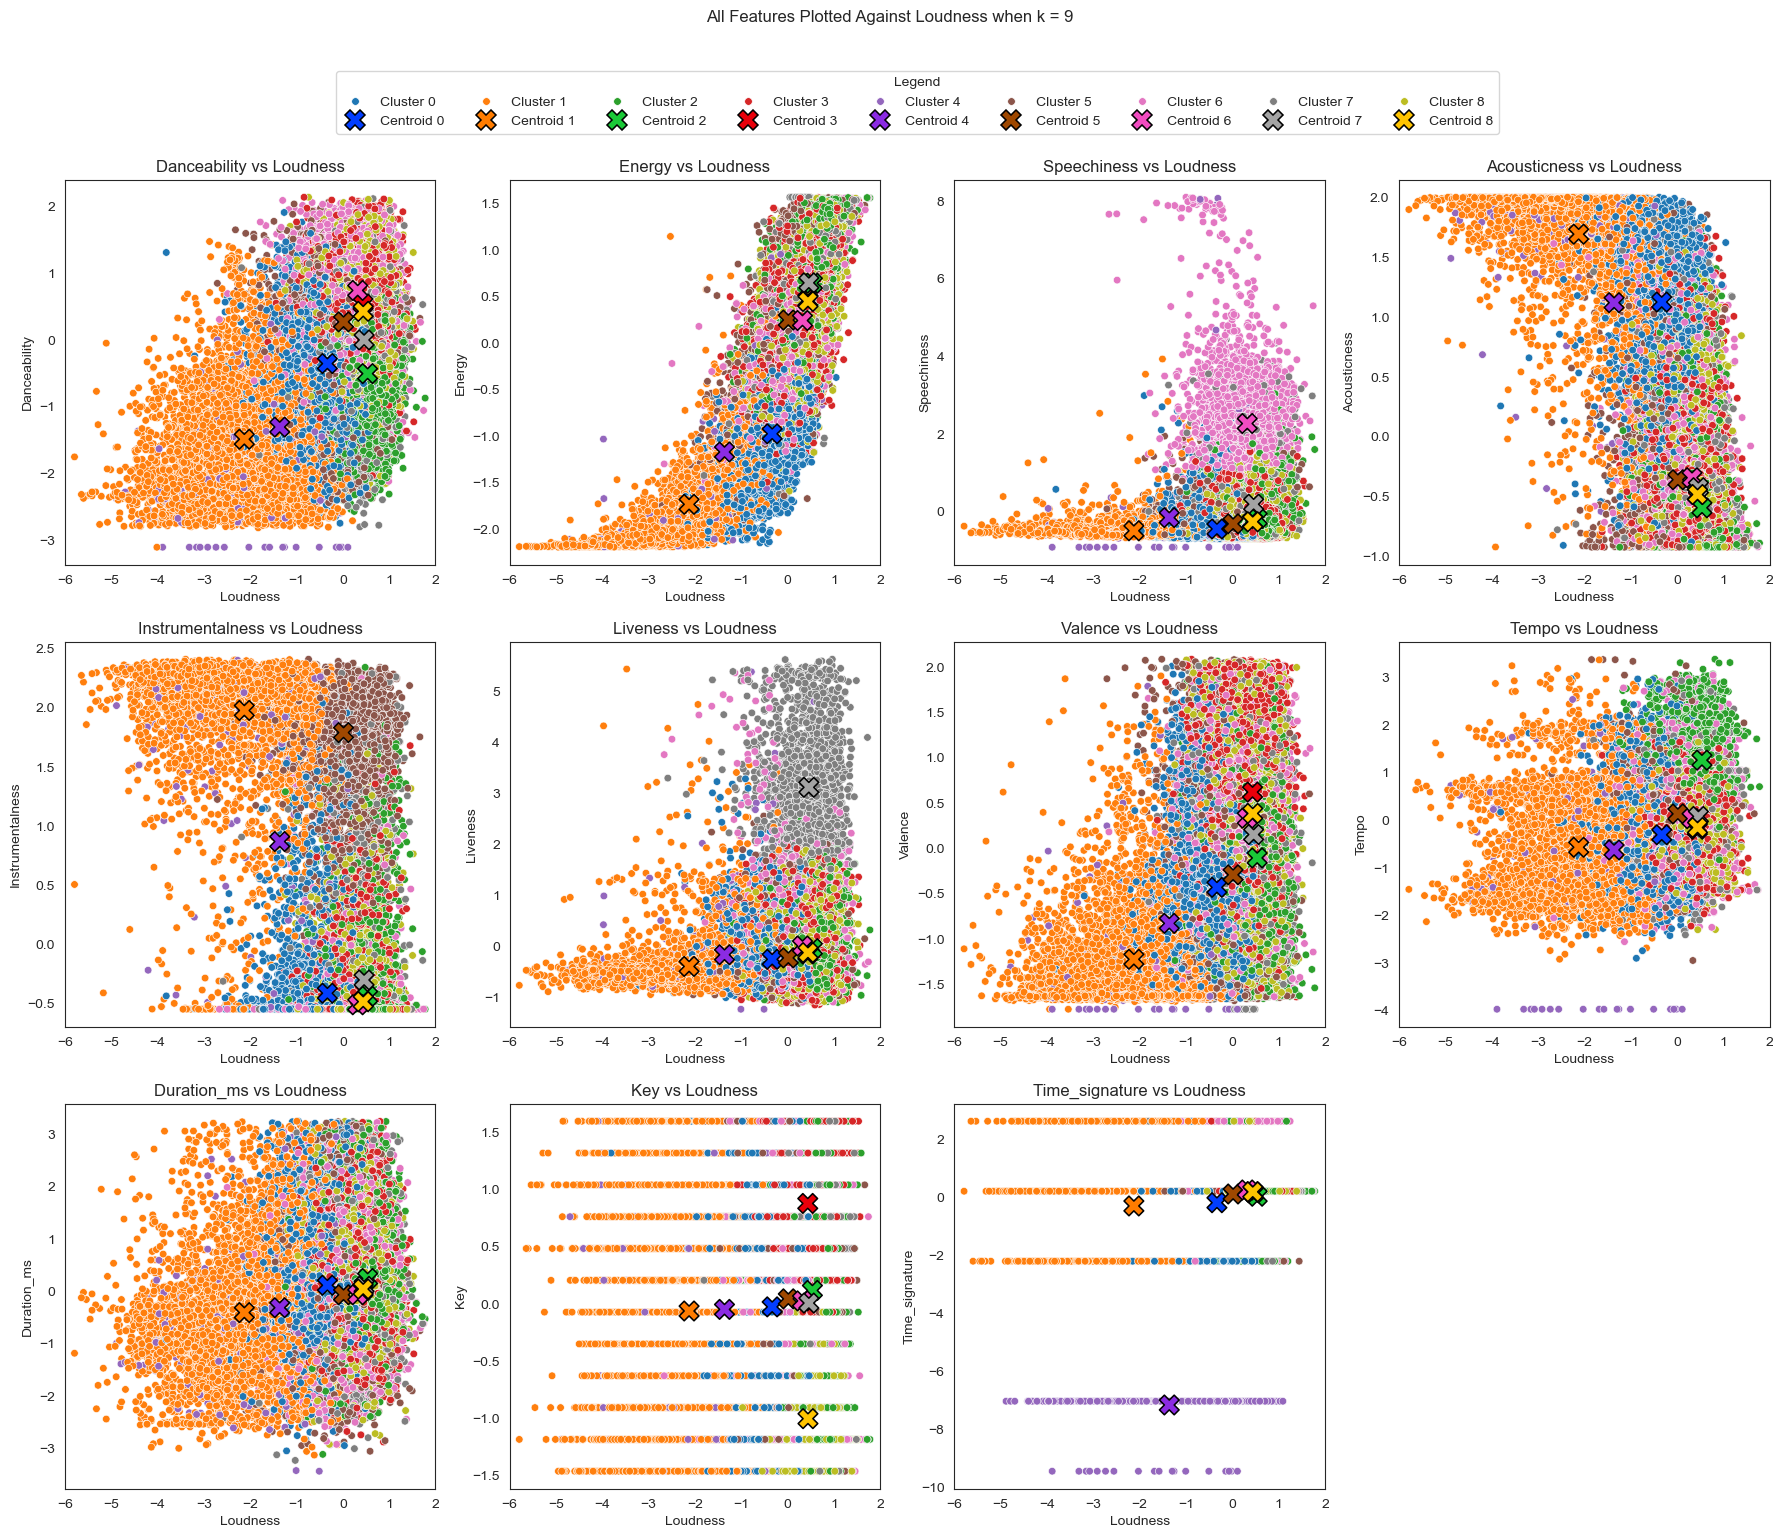

In [33]:
# Initialize the model
sns.set_palette("tab10")
sns.set_style("white")

k = k_max
n_init = 20
max_iter = 400
model = KMeans(n_clusters = k, n_init=n_init, max_iter=max_iter, random_state=seed)
main_col = "loudness"

model.fit(X_normalized)
y_predicted_clusters = model.labels_
model_features = pd.Series(model.feature_names_in_)

xcol_values = [main_col] * model.n_features_in_
ycol_values = list(X_normalized.columns)
ycol_values.remove(main_col)
labels = pd.Series(model.labels_, name="Legend", dtype=str)
labels = "Cluster " + labels.T
hue_order = labels.sort_values().unique()
legend_offset = k * (-2) # Manually calculated to get the right offset

centroid_df = pd.DataFrame(model.cluster_centers_, columns=model_features, index=[f"Centroid {cluster_num}" for cluster_num in range(0,k)])

fig, axes = plt.subplots(3, 4, figsize=(22,17))
axes[2,3].set_visible(False)
plt.suptitle(f"All Features Plotted Against {main_col.capitalize()} when k = {k}")
for i,(xcol, ycol, ax) in enumerate(zip(xcol_values, ycol_values, axes.flatten())):
    sns.scatterplot(x=X_normalized.loc[:,xcol], y=X_normalized.loc[:,ycol], s=30, hue=labels, hue_order=hue_order, palette="tab10", ax=ax)
    sns.scatterplot(x=centroid_df.loc[:, xcol], y=centroid_df.loc[:, ycol], s=200, hue=centroid_df.index, hue_order=centroid_df.index, palette="bright", marker="X", ax=ax, edgecolor="k")
    ax.set_title(f"{ycol.capitalize()} vs {xcol.capitalize()}")
    ax.set_xlabel(xcol.capitalize())
    ax.set_ylabel(ycol.capitalize())
    ax.set_xlim(-6,  2)

    if i == 2:
        legend_handles_reordered = []
        legend_labels_reordered = []
        legend_handles, legend_labels = ax.get_legend_handles_labels()

        [legend_handles_reordered.extend([legend_cluster_handle, legend_centroid_handle]) for legend_cluster_handle, legend_centroid_handle in zip(legend_handles[0:k], legend_handles[k:])]
        [legend_labels_reordered.extend([legend_cluster, legend_centroid]) for legend_cluster, legend_centroid in zip(legend_labels[0:k], legend_labels[k:])]
        ax.legend(handles=legend_handles_reordered, labels=legend_labels_reordered, title="Legend", loc="upper center", bbox_to_anchor=(-.1, 1.3), ncols=k)
    else:
        ax.get_legend().remove()

print(f"Silhouette Score: {silhouette_score(X_normalized, y_predicted_clusters)}\n\n")
# for i, coor in enumerate(model.cluster_centers_):
#     print(f"Cluster {i} centroid coordinates: \n{coor}\n")

**Things to Note**:

* The overall silhouette score is about 12.5%
* There are some noteworthy relationships between audio features
    * There is a positive relationship between energy/danceability (and to a degree, liveness/speechiness) and loudness.
    * There is also a a negative relationship between acousticness/instrumentalness and loudness.
* As each plot uses Loudness as the x-axis, each point's position differs only along the y-axis. 
    * Clusters 1 and 4 appear to have many quiet tracks whereas every other cluster is relatively consistently loud.
* Some clusters are more unique than others
    * Cluster 6 has a relatively high speechiness compared to the others
    * Cluster 7 has a relatively high liveness compared to the others
    * Cluster 4 mainly utilizes lower time signatures than the other clusters 
    * Clusters 1, 4, and 5 are typically higher in instrumentalness
    * Clusters 0, 1, and 4 are typically lower in energy and higher in acousticness

Primary cluster assignment for each genre:

Classical: Cluster 1
Country: Cluster 8
Edm: Cluster 5
Hip hop: Cluster 6
Jazz: Cluster 0
Pop: Cluster 3
R&b: Cluster 3
Rap: Cluster 6
Rock: Cluster 2


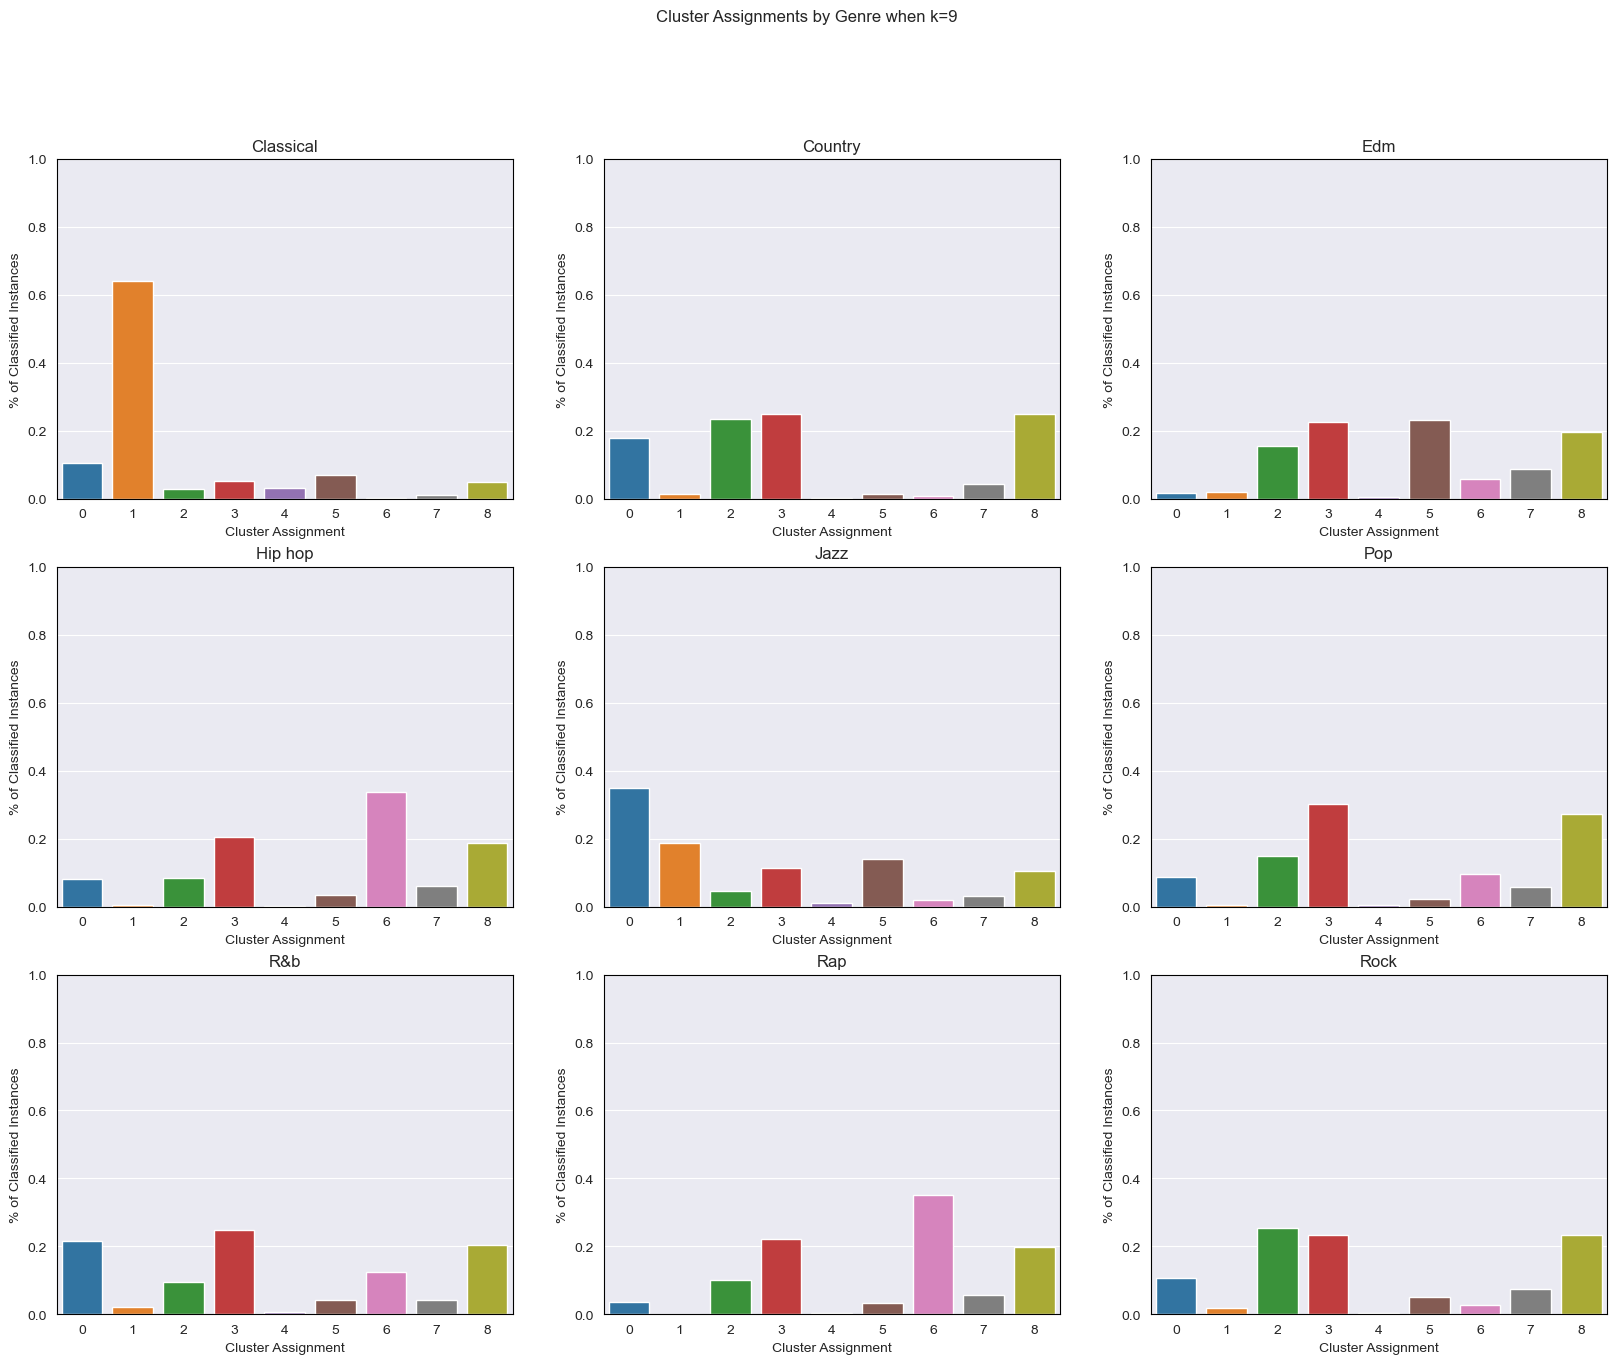

In [34]:
# Finding the proportion of each genre in each cluster
sns.set_palette("tab10")
sns.set_style("darkgrid", {"axes.linewidth":2 , "axes.edgecolor":"black"})

y_clusters = pd.Series(model.labels_, name="Cluster")
cluster_df = pd.concat([y, y_clusters], axis=1)

num_genre_in_each_cluster = cluster_df.groupby(["Cluster", "Genre"]).agg(Count=("Genre", "count"))
num_genre_total = cluster_df.groupby(["Genre"]).agg(Count = ("Genre", "count"))
cluster_df2 = num_genre_in_each_cluster.div(num_genre_total, level="Genre")
cluster_df2.rename(columns={"Count":"% of Classified Instances"}, inplace=True)
cluster_df2 = cluster_df2.sort_values(["Genre", "% of Classified Instances"], ascending=[True, False]).copy().reset_index()

cluster_order = cluster_df2["Cluster"].sort_values().unique()

fig, axes = plt.subplots(3,3, figsize=(20,15))
fig.suptitle(f"Cluster Assignments by Genre when k={k}")
for i, (genre, ax) in enumerate(zip(cluster_df2["Genre"].unique(), axes.flatten())):
    ax = sns.barplot(data=cluster_df2.loc[cluster_df2["Genre"]==genre, :], x="Cluster", y="% of Classified Instances", hue="Cluster", palette="tab10", hue_order=cluster_order, ax=ax, legend=False)
    ax.set_ylim(0, 1)
    ax.set_title(genre.capitalize())
    ax.set_xlabel("Cluster Assignment")

    
n_clusters = 1
print(f"Primary cluster assignment for each genre:\n")
for genre in cluster_df2["Genre"].unique():
    cluster_num = cluster_df2.groupby("Genre").head(n_clusters).set_index("Genre").loc[genre, "Cluster"]
    print(f"{genre.capitalize()}: Cluster {cluster_num}")

#### Cluster results:
* **Cluster 0**: Jazz
    * The scatterplots imply that this cluster is typically lower in energy and acousticness
* **Cluster 1**: Classical
    * The scatterplots imply that this cluster is typically low in liveness, energy, and speechiness, and high in acousticness and instrumentalness.
* **Cluster 2**: Rock
    * The scatterplots imply that this cluster tends to have higher tempos
* **Cluster 3**: Pop, R&B
    * The scatterplots imply that this cluster is typically higher in valence and key
* **Cluster 5**: EDM
    * The scatterplots imply that this cluster is typically lower in acousticness and higher in energy, instrumentalness, and danceability.
* **Cluster 6**: Hiphop, Rap
    * The scatterplots imply that this cluster is typically high in speechiness, danceability, and energy
* **Cluster 8**: Country
    * The scatterplots imply that this cluster is typically low in instrumentalness, liveness, and speechiness and high in acousticness.
#### Important Takeaways
* Notably, about only one genre (Classical) is predominantly sorted into a single cluster.
* There are 5 unique clusters total corresponding to Jazz, Classical, Rock, EDM ,and Country. However, it is good to note that of these genres, only Jazz is confidently sorted whereas the others are pretty evenly split between clusters.
    * Country, Rock, EDM, and R&B each have the most even splits
* There are only 7 clusters with final genre assignments, indicating that there are **not** 9 distinct genre categories in this dataset.

## 3.2: Which genres are similar, and which genres are distinct?

Here, I will solve for the k-value range at the elbow point of the WCSS plot. I will then choose the k-value that gives the minimum most-useful number of clusters (which happens to be k=4).

k=3 seems to be a reasonable number of clusters, though 4/5 could also be tested as well



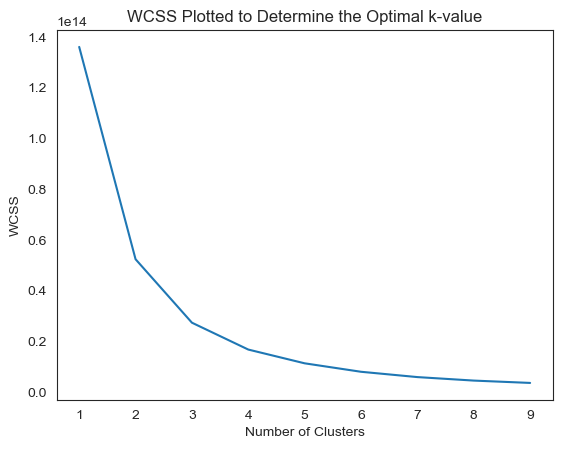

In [35]:
# Finding k
sns.set_palette("tab10")
sns.set_style("white")

WCSS = []
n_init = 20
max_iter = 400

for i in range(1, k_max+1):
    test_model = KMeans(n_clusters = i, n_init=n_init, max_iter=max_iter, random_state=seed)
    test_model.fit(X)
    WCSS.append(test_model.inertia_)
    
sns.set_palette("tab10")
ax = sns.lineplot(x=range(1, k_max+1), y=WCSS)
ax.set_title('WCSS Plotted to Determine the Optimal k-value')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('WCSS')

print("k=3 seems to be a reasonable number of clusters, though 4/5 could also be tested as well\n")

Silhouette Score: 0.14751511432538666




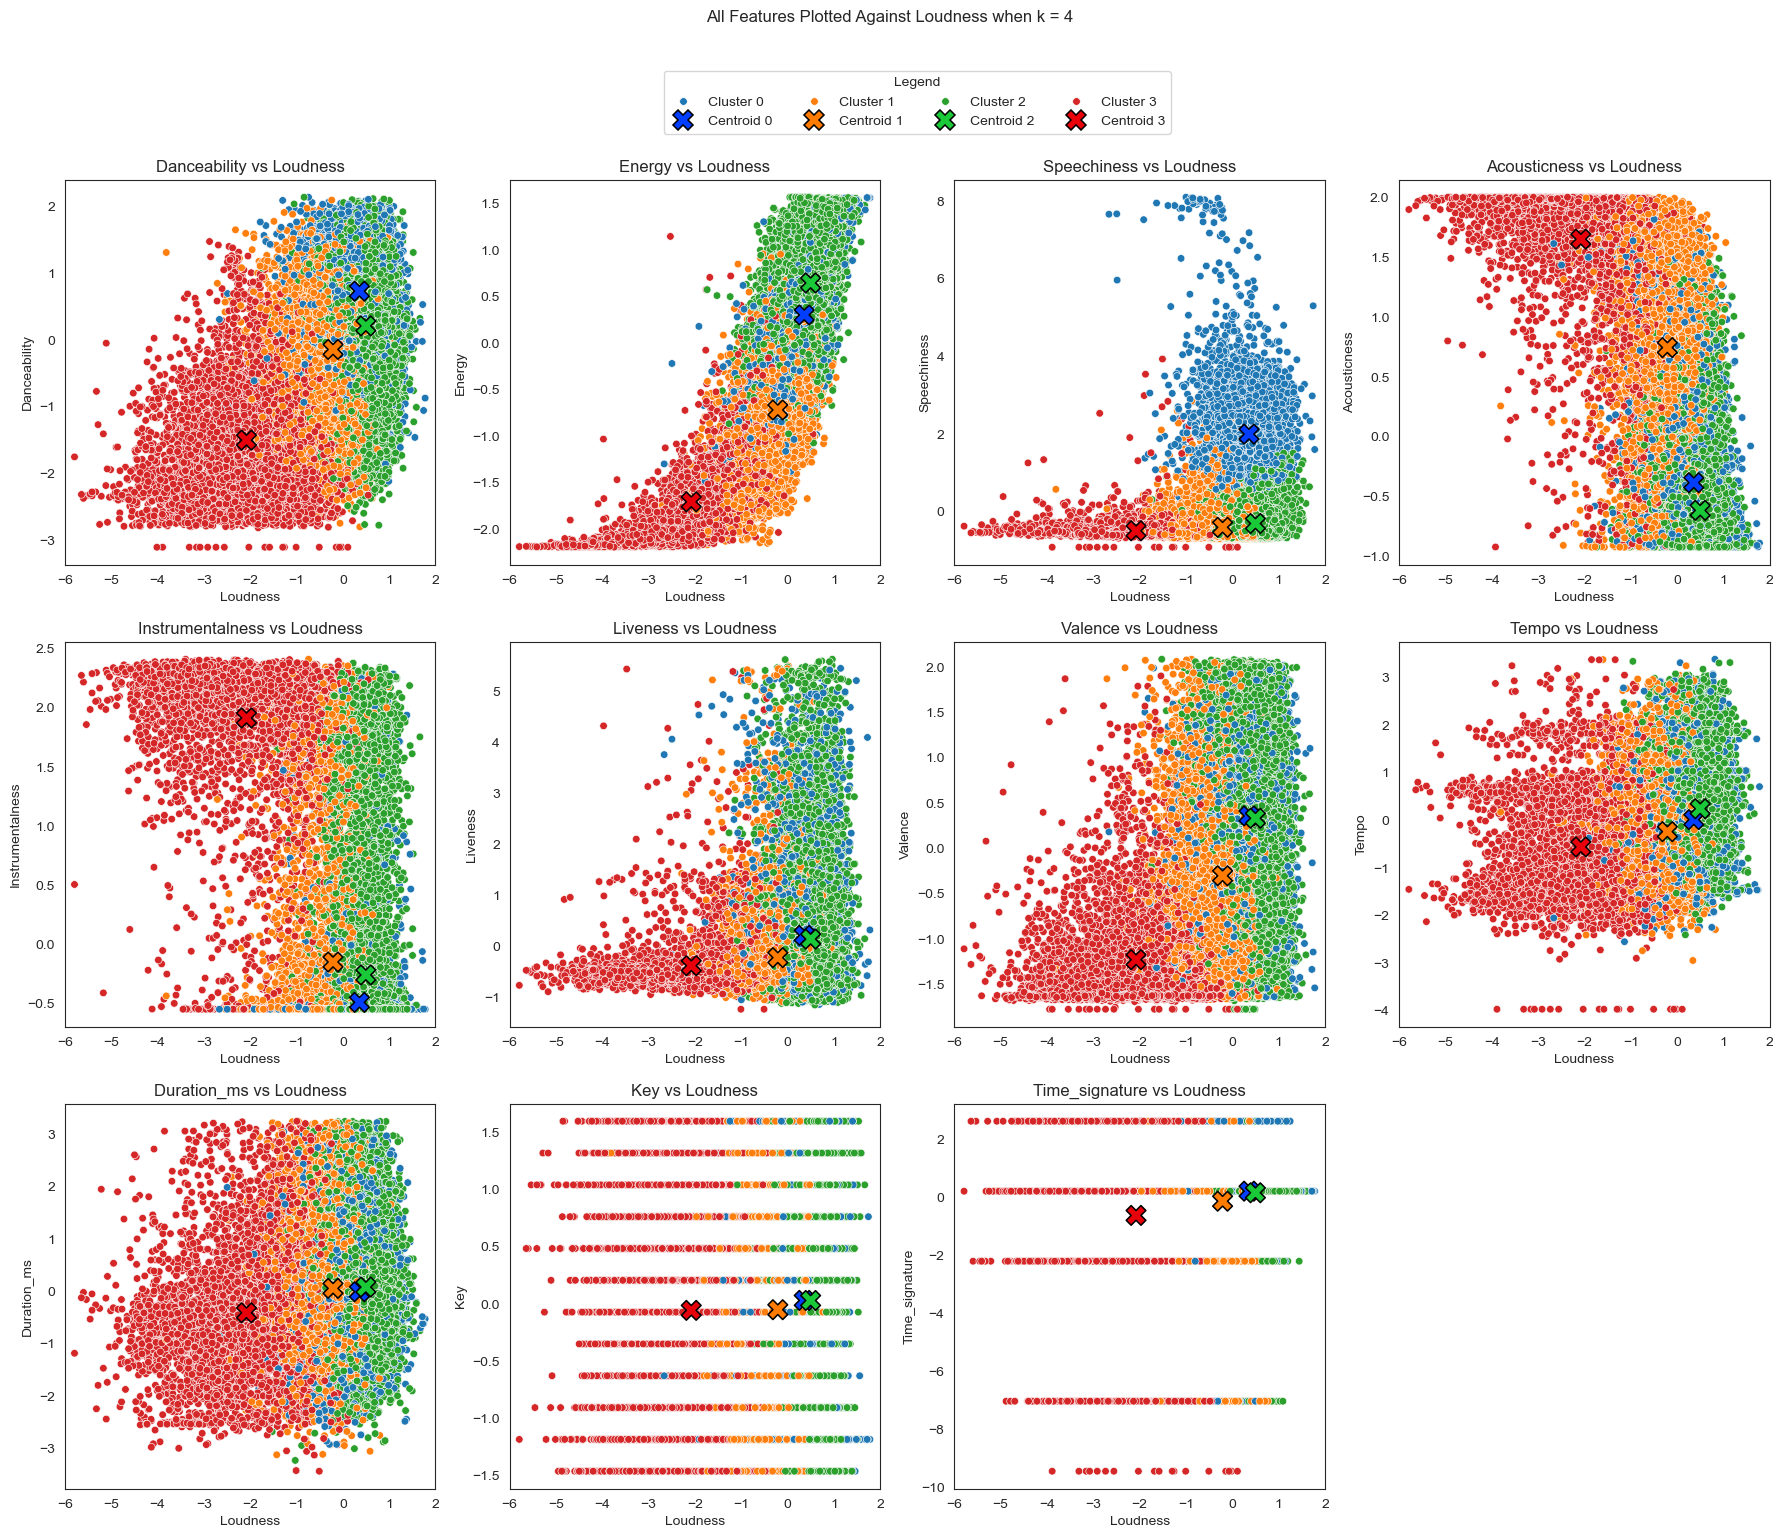

In [36]:
# Repeat the experiment but with k=4 (the elbow point)
sns.set_palette("tab10")
sns.set_style("white")

k = 4
n_init = 20
max_iter = 400
model = KMeans(n_clusters = k, n_init=n_init, max_iter=max_iter, random_state=seed)
main_col = "loudness"

model.fit(X_normalized)
y_predicted_clusters = model.labels_
model_features = pd.Series(model.feature_names_in_)

xcol_values = [main_col] * model.n_features_in_
ycol_values = list(X_normalized.columns)
ycol_values.remove(main_col)
labels = pd.Series(model.labels_, name="Legend", dtype=str)
labels = "Cluster " + labels.T
hue_order = labels.sort_values().unique()

centroid_df = pd.DataFrame(model.cluster_centers_, columns=model_features, index=[f"Centroid {cluster_num}" for cluster_num in range(0,k)])

fig, axes = plt.subplots(3, 4, figsize=(22,17))
axes[2,3].set_visible(False)
plt.suptitle(f"All Features Plotted Against {main_col.capitalize()} when k = {k}")
for i,(xcol, ycol, ax) in enumerate(zip(xcol_values, ycol_values, axes.flatten())):
    sns.scatterplot(x=X_normalized.loc[:,xcol], y=X_normalized.loc[:,ycol], s=30, hue=labels, hue_order=hue_order, palette="tab10", ax=ax)
    sns.scatterplot(x=centroid_df.loc[:, xcol], y=centroid_df.loc[:, ycol], s=200, hue=centroid_df.index, hue_order=centroid_df.index, palette="bright", marker="X", ax=ax, edgecolor="k")
    ax.set_title(f"{ycol.capitalize()} vs {xcol.capitalize()}")
    ax.set_xlabel(xcol.capitalize())
    ax.set_ylabel(ycol.capitalize())
    ax.set_xlim(-6,  2)

    if i == 2:
        legend_handles_reordered = []
        legend_labels_reordered = []
        legend_handles, legend_labels = ax.get_legend_handles_labels()

        [legend_handles_reordered.extend([legend_cluster_handle, legend_centroid_handle]) for legend_cluster_handle, legend_centroid_handle in zip(legend_handles[0:k], legend_handles[k:])]
        [legend_labels_reordered.extend([legend_cluster, legend_centroid]) for legend_cluster, legend_centroid in zip(legend_labels[0:k], legend_labels[k:])]
        ax.legend(handles=legend_handles_reordered, labels=legend_labels_reordered, title="Legend", loc="upper center", bbox_to_anchor=(-.1, 1.3), ncols=k)
    else:
        ax.get_legend().remove()

print(f"Silhouette Score: {silhouette_score(X_normalized, y_predicted_clusters)}\n\n")
# for i, coor in enumerate(model.cluster_centers_):
#     print(f"Cluster {i} centroid coordinates: \n{coor}\n")

**Things to Note**:
* The overall silhouette score is about 14.8%
* Cluster 3 is the most distinct as its tracks are typically:
    * much quieter
    * lower in liveness, valence, energy, danceability, and speechiness
    * higher in instrumentalness and acousticness
* Cluster 1 is distinct in that it is in the middle of the range for Energy, Acousticness, and Valence. However, it tends to be fairly close to clusters 0 and 2
* Clusters 0 and 2 span very similar ranges, and tend to have:
    * higher time signatures, liveness, valence, energy, danceability, and speechiness
    * lower instrumentalness and acousticness
    * The main difference is that cluster 0 has the highest average speechiness compared to the other clusters.

Primary cluster assignment for each genre:

Classical: Cluster 3
Country: Cluster 2
Edm: Cluster 2
Hip hop: Cluster 0
Jazz: Cluster 1
Pop: Cluster 2
R&b: Cluster 2
Rap: Cluster 0
Rock: Cluster 2


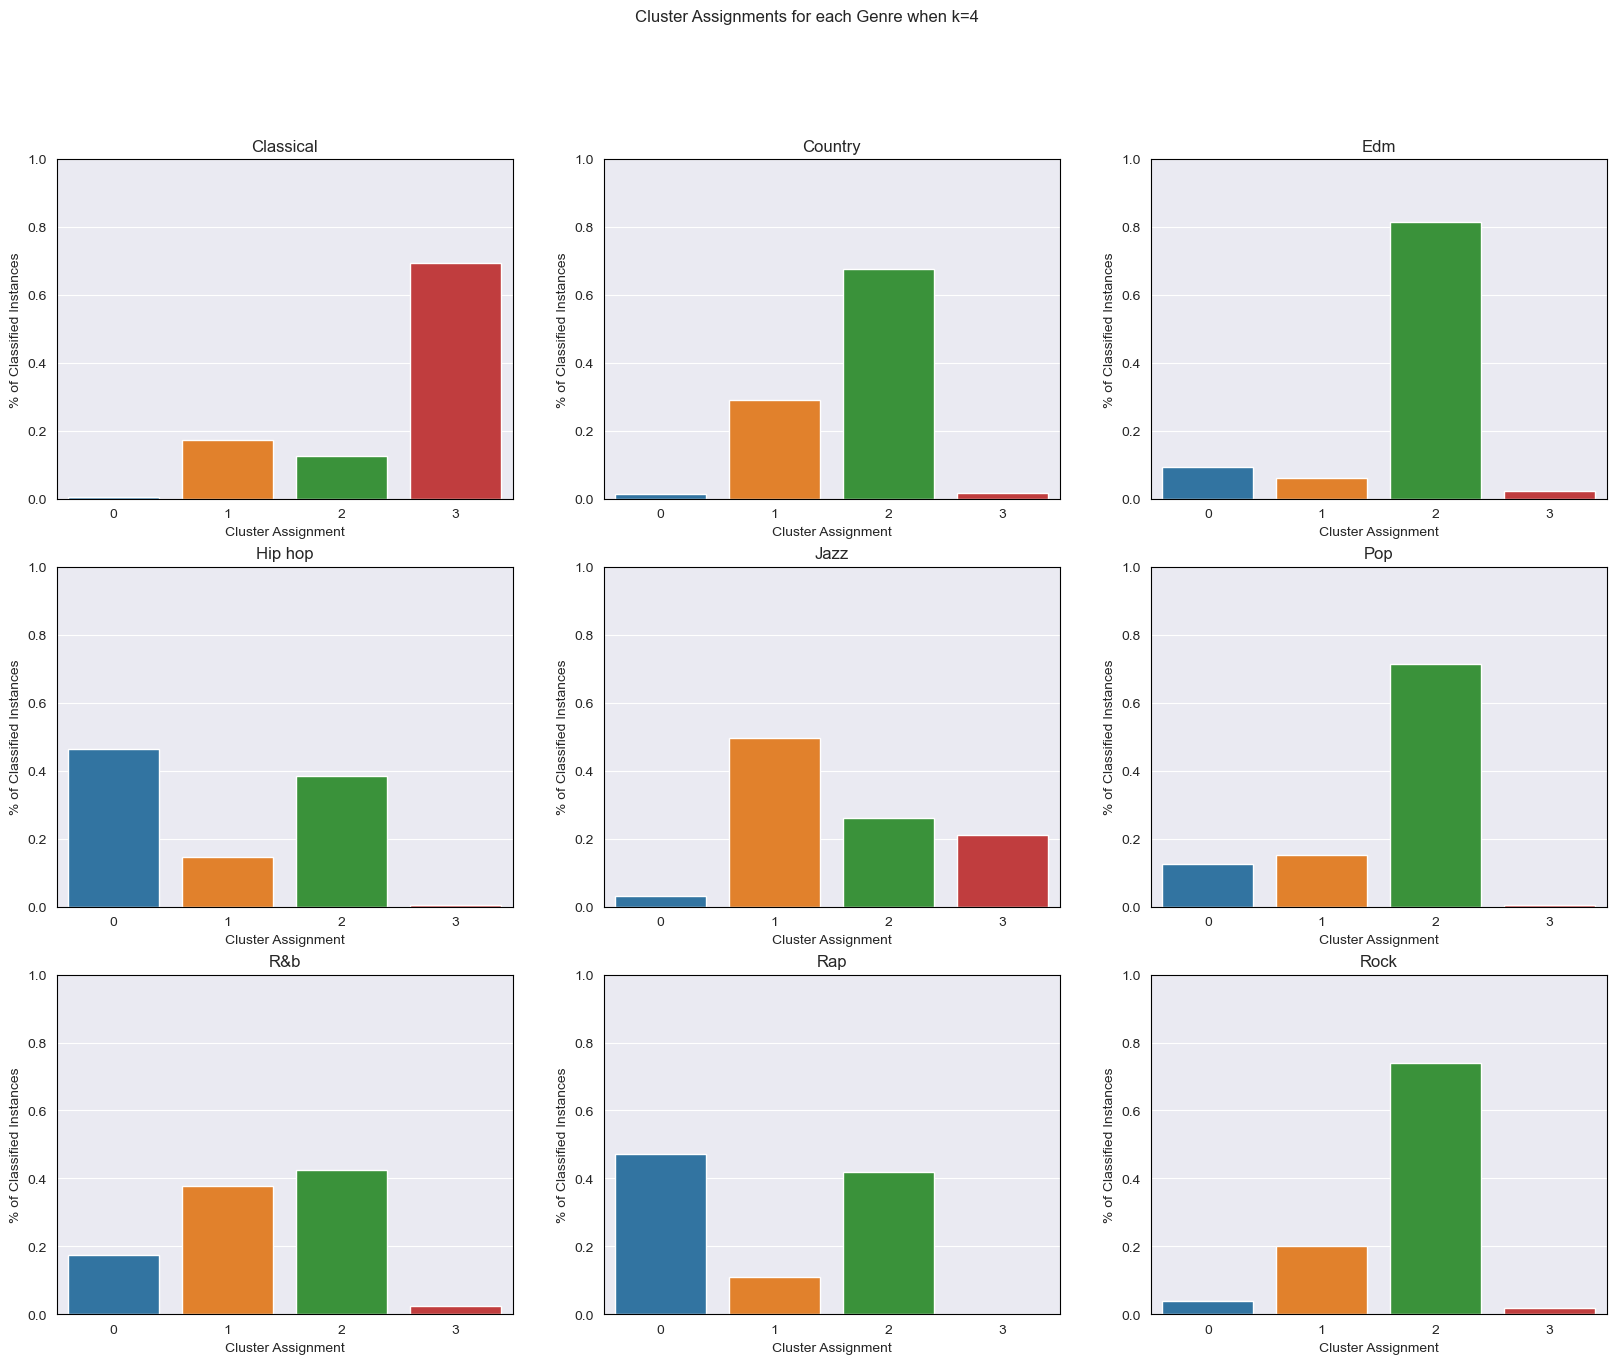

In [37]:
# Showing the results for 4 clusters
sns.set_palette("tab10")
sns.set_style("darkgrid", {"axes.linewidth":2 , "axes.edgecolor":"black"})

y_clusters = pd.Series(model.labels_, name="Cluster")
cluster_df = pd.concat([y, y_clusters], axis=1)

num_genre_in_each_cluster = cluster_df.groupby(["Cluster", "Genre"]).agg(Count=("Genre", "count"))
num_genre_total = cluster_df.groupby(["Genre"]).agg(Count = ("Genre", "count"))
cluster_df2 = num_genre_in_each_cluster.div(num_genre_total, level="Genre")
cluster_df2.rename(columns={"Count":"% of Classified Instances"}, inplace=True)
cluster_df2 = cluster_df2.sort_values(["Genre", "% of Classified Instances"], ascending=[True, False]).copy().reset_index()

cluster_order = cluster_df2["Cluster"].sort_values().unique()

fig, axes = plt.subplots(3,3, figsize=(20,15))
fig.suptitle(f"Cluster Assignments for each Genre when k={k}")
for i, (genre, ax) in enumerate(zip(cluster_df2["Genre"].unique(), axes.flatten())):
    ax = sns.barplot(data=cluster_df2.loc[cluster_df2["Genre"]==genre, :], x="Cluster", y="% of Classified Instances", hue="Cluster", palette="tab10", hue_order=cluster_order, ax=ax, legend=False)
    ax.set_ylim(0, 1)
    ax.set_xlabel("Cluster Assignment")
    ax.set_title(genre.capitalize())
    
n_clusters = 1
print(f"Primary cluster assignment for each genre:\n")
for genre in cluster_df2["Genre"].unique():
    cluster_num = cluster_df2.groupby("Genre").head(n_clusters).set_index("Genre").loc[genre, "Cluster"]
    print(f"{genre.capitalize()}: Cluster {cluster_num}")

#### Cluster results:
* **Cluster 0**: Hiphop, Rap
    * The scatterplots imply that this cluster is typically:
        * higher time signatures, liveness, valence, energy, danceability, and speechiness
            * Speechiness is particularly high in this cluster
        * lower instrumentalness and acousticness
* **Cluster 1**: Jazz
    * The scatterplots imply that this cluster is typically:
        * in the middle of the range of energy, acousticness, and valence
* **Cluster 2**: Country, EDM, Pop, Rock, R&B
    * The scatterplots imply that this cluster is typically:
        * higher energy and tempo
        * lower acousticness
        * overall, this is the loudest cluster
* **Cluster 3**: Classical
    * The scatterplots imply that this cluster is typically:
        * much quieter
        * lower in valence, energy, and danceability
        * higher in instrumentalness and acousticness

#### Important Takeaways:
* This time, Classical, EDM, and Rock are the most predominantly assigned to a single cluster. Rap and R&B are the most split between two majority clusters.
* Jazz and Classical are the only genres with a unique majority cluster, but only Classical is confidently sorted.
* Pop/Rock/EDM each have very similar cluster assignment proportions, possibly indicating a lot of similarities between this genre grouping. There is also a similar distribution between Rap and Hiphop, indicating that those genres might be fairly similar as well. 
    * Though it is not a part of this analysis, it might be interesting to create a secondary cluster label based on the cluster assignment distributions, as the similarities in distributions imply that there might actually be as many as 6 useful clusters

## Objective 3: Conclusion

### Can cluster analysis on the audio features determine which genres are similar and which genres are distinct?

Yes, cluster analysis reveals a lot of interesting facts about the genre instances in this dataset based on the cluster formations. Many of these facts appear to be highly generalizable to other instances of each genre.

#### 1. Does this dataset contain 9 distinctive genre categories?
Only two genres, Classical and Jazz, were noticeably distinct from the other genres in both cluster models, but really only Classical was very confidently sorted into a distinct cluster. Also, the k=9 model cluster assignment distributions suggested that the genres could be reduced down to at most, 7 separate clusters:
* **Cluster 0**: Jazz
* **Cluster 1**: Classical
* **Cluster 2**: Rock
* **Cluster 3**: Pop, R&B
* **Cluster 5**: EDM
* **Cluster 6**: Hiphop, Rap
* **Cluster 8**: Country
It is important to note, though, that the silhouette scores for both the k=9 and k=4 models were both fairly low at 0.12 and 0.15 respectively, indicating that calculated clusters were not very homogeneous.

#### 2. Which genres are similar, and which genres are distinct?
* Classical appears to be the most distinct genre as it was the only genre confidently sorted into a single cluster at both k=4 and k=9. Its main cluster is typically much quieter and with high proportions of acoustic/instrumental elements. 
    * The genre closest to Classical appears to be Jazz. Interestingly, though, these two were sorted into their own unique clusters with the k=9 model. This revealed that the genres differ in the following ways:
        * Jazz tends to be louder, happier, and more energetic than Classical
        * Jazz is less acoustic than Classical
        * The largest difference is that Classical has a significantly higher number of instrumental tracks.
* Hiphop and Rap appear to be very similar as their cluster appears to have high rates of speechiness.
* EDM, Pop, and Rock all apear to be similar, at least when k=4. At higher k-values, EDM is split into a group that is higher in instrumentalness and valence.

#### Important Considerations
For this analysis, I scaled each feature using the StandardScaler. This does weight every feature fairly, but it does simplify the relationships between the features, possibly causing inaccuracies in the model. There could also be more preprocessing required to make the variables more useful. For example, should the loudness have been kept on the decibel scale before Standard Scaler was applied, or transformed to a different scale first? Could any have been scaled logarithmically? Should all of them have been scaled at all? There is also the fact that key, mode, and time signature are more categorical than the others, so their contributions may be harder to tune.

This analysis does also assume that each instance in the dataset is representative of the genre of the playlist that it was added to. If certain genres had a high amount of genre variability in their respective playlist sets, then analyzing the audio features of those genres may lead to incorrect conclusions of similarity.

# Conclusion

#### Limitations
There are some important things to note which may have affect the analyses

* The genre labels are assumed to be correct
    * As noted previously, the genre labels are not explicitly attached to the songs on Spotify - instead they are inferred from the playlist they are extracted from, i.e., if a Rap song was incorrectly included in a Classical playlist, its label would incorrectly be set to Classical. 
    * The subgenre seeds were used to expand the genre search scopes, but this may have also introduced biases (for example, one Rap subgenre is "Pop Rap" which could fall under both Pop and Rap)
* The chosen genres may not truly be distinct
    * When gathering a list of musical genres, I chose some of the most popular categories, but some might be more similar to each other - this would make building a classifier difficult if the genres are not truly independent.
* The popularity values are weighted in favor of recent tracks
    * Analyzing genre popularity for older tracks using Spotify's popularity metric might not be appropriate since it assigns a higher weight to tracks with more recent listens. This makes this more of a current popularity metric rather than an overall popularity metric.. Thus, the analysis of genre popularity over time might not be entirely accurate the further back in time you go.
